<a href="https://colab.research.google.com/github/alortiz05/DSBC_Cohort16-Projects/blob/main/Final_Project_1_AmberOrtiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Transaction Success Prediction



This project looks at transaction data. One very important subset of performing data science on transaction data consists of binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this project, we want to predict whether or not a future customer will make a transaction based on their transaction data.

The data provided has the same structure as real data typically available to solve this problem. The columns of the input variables have been anonymized, so there is no intuition available to help judge which variables might be more important, so all variables need to be considered equally.

The project should be done using the Gaussian Naive Bayes classification techniques as covered in class. In this directory is included a recommended "To Do" list for the
project.

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv


# Naive Bayes Classification to Predict Transaction Success

**Deep Dive Coding Data Science Bootcamp Project 1**

---
Amber Ortiz - February 21, 2025



## Problem Definition


The goal is to take transaction data  based on transaction records predict whether or not a customer will make a transaction.  This is a binary classification problem since each customer either did or did not make a purchase.  This project will use Naive Bayes classification.  

## Data Collection/Sources

### Data Overview

This data comes from [AWS S3](https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv).

The Transaction dataset includes transaction dataticketing information for each customer and an entry identifying whether or not they made a transaction.

There are 4 fields for each customer such as:
- target: successful transaction (1) or no transaction (0)
- unnamed
- ID_code
- var_1-49: which are unknown variables realted to the customer transactions success or failure


###Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

###File Paths

File path for train and test data

In [ ]:
project1='https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv'




```
# This is formatted as code
```

###Load Data

In [ ]:
project_data = pd.read_csv(project1)
project_data.head()

Unnamed: 0  ID_code  target    var_0   var_1    var_2   var_3   var_4  \
0           0  train_0       0   8.9255 -6.7863  11.9081  5.1187  5.7470   
1           1  train_1       0  11.5006 -4.1473  13.8588  5.6208  8.0851   
2           2  train_2       0   8.6093 -2.7457  12.0805  6.9427  5.9525   
3           3  train_3       0  11.0604 -2.1518   8.9522  5.8428  8.2450   
4           4  train_4       0   9.8369 -1.4834  12.8746  5.9405  7.6784   

     var_5    var_6  ...  var_40  var_41   var_42   var_43   var_44   var_45  \
0  14.0137   0.5745  ...  5.4879 -4.7645   3.1531  18.5618   1.7202  25.8398   
1  14.0239   8.4135  ...  5.7999  5.5378   5.5134  30.2645  11.0752  22.5441   
2  14.1929   7.3124  ...  5.7690 -7.0927  -5.8234  25.6820   2.4013  23.0866   
3  13.8463  11.9704  ...  5.3430 -7.1541  11.7134  14.7483   5.6961  -0.4639   
4  13.8481   7.8895  ...  5.5518  1.4493   2.3705  18.4685   5.1743  11.8503   

   var_46  var_47  var_48   var_49  
0  4.4354  3.9642  3.1364  12.7803  
1  7.6421  7.7214  2.5837  18.3560  
2  2.9057  9.7905  1.6704  14.7222  
3  4.4666  4.7433  0.7178  17.9697  
4 -1.4905  9.5214 -0.1508  17.9974  

[5 rows x 53 columns]

##Data Cleaning

- not unique identifiers are not useful
- unnamed and id_code are not data metrics
- be aware of duplicates and nulls
  - doing something with them may or may not be necessary
- missing data, how do we know its missing? we must be able to compare it to something.


In [ ]:
len(project_data) #will provide me with the number of rows in my data set

180000

In [ ]:
project_data.shape #we now know this has 53 columns in addition to the 180K rows.

(180000, 53)

In [ ]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  180000 non-null  int64  
 1   ID_code     180000 non-null  object 
 2   target      180000 non-null  int64  
 3   var_0       180000 non-null  float64
 4   var_1       180000 non-null  float64
 5   var_2       180000 non-null  float64
 6   var_3       180000 non-null  float64
 7   var_4       180000 non-null  float64
 8   var_5       180000 non-null  float64
 9   var_6       180000 non-null  float64
 10  var_7       180000 non-null  float64
 11  var_8       180000 non-null  float64
 12  var_9       180000 non-null  float64
 13  var_10      180000 non-null  float64
 14  var_11      180000 non-null  float64
 15  var_12      180000 non-null  float64
 16  var_13      180000 non-null  float64
 17  var_14      180000 non-null  float64
 18  var_15      180000 non-null  float64
 19  va

In [ ]:
project_data.describe() #get summary statistics for each column

Unnamed: 0         target          var_0          var_1  \
count  180000.000000  180000.000000  180000.000000  180000.000000   
mean    89999.500000       0.100222      10.678650      -1.630045   
std     51961.668564       0.300297       3.041036       4.050519   
min         0.000000       0.000000       0.408400     -15.043400   
25%     44999.750000       0.000000       8.451675      -4.745600   
50%     89999.500000       0.000000      10.526750      -1.611250   
75%    134999.250000       0.000000      12.756200       1.360225   
max    179999.000000       1.000000      20.315000      10.376800   

               var_2          var_3          var_4          var_5  \
count  180000.000000  180000.000000  180000.000000  180000.000000   
mean       10.712922       5.408688       7.566953      14.024017   
std         2.639146       0.866265       1.235043       0.190038   
min         2.117100       2.347300       3.970500      13.434600   
25%         8.720000       4.768500       6.618800      13.893900   
50%        10.579600       5.385600       7.628500      14.025500   
75%        12.514100       6.003200       8.583800      14.164400   
max        19.353000       8.447700      11.150600      14.654500   

              var_6          var_7  ...         var_40         var_41  \
count  180000.00000  180000.000000  ...  180000.000000  180000.000000   
mean        8.52808      15.243424  ...       5.635897      -0.000418   
std         4.64170       7.851050  ...       0.369629       4.422915   
min        -6.01110     -10.664200  ...       4.258800     -14.506000   
25%         5.06575       9.170200  ...       5.374200      -3.253575   
50%         8.59920      15.198900  ...       5.634500       0.008500   
75%        12.27330      21.010500  ...       5.905600       3.098325   
max        22.33150      41.748000  ...       7.089000      16.731900   

              var_42         var_43         var_44         var_45  \
count  180000.000000  180000.000000  180000.000000  180000.000000   
mean       -0.668334      20.208845       2.595090      12.756574   
std         5.968300       7.132446       2.801692       9.320939   
min       -22.748700      -2.995300      -7.856100     -18.489700   
25%        -4.997500      15.062900       0.628600       5.661300   
50%        -0.560300      20.203300       2.513800      12.520300   
75%         3.632525      25.639125       4.396725      19.461725   
max        18.855400      43.546800      13.448700      44.363400   

              var_46         var_47         var_48         var_49  
count  180000.000000  180000.000000  180000.000000  180000.000000  
mean        3.236201       7.440715       1.927078      15.870166  
std         4.561317       3.021636       1.476777       3.010492  
min       -14.093300      -2.691700      -3.814500       6.299300  
25%        -0.062000       5.160325       0.890000      13.830400  
50%         3.204650       7.350950       1.899700      15.934600  
75%         6.409900       9.511125       2.947225      18.061425  
max        18.440900      16.716500       8.402400      26.079100  

[8 rows x 52 columns]

In [ ]:
# Get memory usage of each column
memory_usage_bytes = project_data.memory_usage(index=True)

# Get total memory usage
total_bytes = memory_usage_bytes.sum()

print(f"Memory usage per column:\n{memory_usage_bytes}")
print(f"\nTotal memory usage: {total_bytes} bytes")

Memory usage per column:
Index             132
Unnamed: 0    1440000
ID_code       1440000
target        1440000
var_0         1440000
var_1         1440000
var_2         1440000
var_3         1440000
var_4         1440000
var_5         1440000
var_6         1440000
var_7         1440000
var_8         1440000
var_9         1440000
var_10        1440000
var_11        1440000
var_12        1440000
var_13        1440000
var_14        1440000
var_15        1440000
var_16        1440000
var_17        1440000
var_18        1440000
var_19        1440000
var_20        1440000
var_21        1440000
var_22        1440000
var_23        1440000
var_24        1440000
var_25        1440000
var_26        1440000
var_27        1440000
var_28        1440000
var_29        1440000
var_30        1440000
var_31        1440000
var_32        1440000
var_33        1440000
var_34        1440000
var_35        1440000
var_36        1440000
var_37        1440000
var_38        1440000
var_39        1440000
var_40 

In [ ]:
project_data.isnull().sum() #this first creates a boolean that tells me if there is a null but addint in the .sum will sum each column with how many nulls there are

Unnamed: 0    0
ID_code       0
target        0
var_0         0
var_1         0
var_2         0
var_3         0
var_4         0
var_5         0
var_6         0
var_7         0
var_8         0
var_9         0
var_10        0
var_11        0
var_12        0
var_13        0
var_14        0
var_15        0
var_16        0
var_17        0
var_18        0
var_19        0
var_20        0
var_21        0
var_22        0
var_23        0
var_24        0
var_25        0
var_26        0
var_27        0
var_28        0
var_29        0
var_30        0
var_31        0
var_32        0
var_33        0
var_34        0
var_35        0
var_36        0
var_37        0
var_38        0
var_39        0
var_40        0
var_41        0
var_42        0
var_43        0
var_44        0
var_45        0
var_46        0
var_47        0
var_48        0
var_49        0
dtype: int64

In [ ]:
project_data.tail()

Unnamed: 0       ID_code  target    var_0   var_1    var_2   var_3  \
179995      179995  train_179995       0   8.9112 -4.4900  11.3795  5.4164   
179996      179996  train_179996       0   8.2722  7.1923  16.7300  4.9698   
179997      179997  train_179997       0  12.4902 -2.9379   6.5901  4.7242   
179998      179998  train_179998       0   8.4894  0.7048  11.1518  4.6370   
179999      179999  train_179999       0  11.6252  3.3959  11.5558  4.2003   

         var_4    var_5    var_6  ...  var_40  var_41  var_42   var_43  \
179995  8.3309  14.1869  12.8219  ...  5.9355  5.1764 -5.4817  20.7390   
179996  5.4907  14.0238  11.9933  ...  5.3550 -1.5556  7.3839   9.9193   
179997  9.1423  13.9133  12.2314  ...  6.0708 -0.3463 -5.0098  20.4807   
179998  8.1321  14.2921   6.9582  ...  5.5161  3.1774 -4.9374  23.6365   
179999  7.4666  13.7381  12.9590  ...  5.0415 -2.4210 -3.6829  14.2422   

        var_44   var_45  var_46   var_47  var_48   var_49  
179995 -0.8043  31.3663  8.7194   4.7839  0.9673  14.9529  
179996  5.0860  28.0185  7.4145   4.2814  2.5575  15.3969  
179997  5.9814  20.2668  3.1006   3.7701  0.1299  16.1256  
179998  1.0432  29.9365  9.6381   6.9649  2.5546  15.6760  
179999  1.0741  26.3943  4.1482  11.9539  2.9846  15.6002  

[5 rows x 53 columns]





###Deleting Columns

In [ ]:
project1 = project_data.copy()
project1.head()


Unnamed: 0  ID_code  target    var_0   var_1    var_2   var_3   var_4  \
0           0  train_0       0   8.9255 -6.7863  11.9081  5.1187  5.7470   
1           1  train_1       0  11.5006 -4.1473  13.8588  5.6208  8.0851   
2           2  train_2       0   8.6093 -2.7457  12.0805  6.9427  5.9525   
3           3  train_3       0  11.0604 -2.1518   8.9522  5.8428  8.2450   
4           4  train_4       0   9.8369 -1.4834  12.8746  5.9405  7.6784   

     var_5    var_6  ...  var_40  var_41   var_42   var_43   var_44   var_45  \
0  14.0137   0.5745  ...  5.4879 -4.7645   3.1531  18.5618   1.7202  25.8398   
1  14.0239   8.4135  ...  5.7999  5.5378   5.5134  30.2645  11.0752  22.5441   
2  14.1929   7.3124  ...  5.7690 -7.0927  -5.8234  25.6820   2.4013  23.0866   
3  13.8463  11.9704  ...  5.3430 -7.1541  11.7134  14.7483   5.6961  -0.4639   
4  13.8481   7.8895  ...  5.5518  1.4493   2.3705  18.4685   5.1743  11.8503   

   var_46  var_47  var_48   var_49  
0  4.4354  3.9642  3.1364  12.7803  
1  7.6421  7.7214  2.5837  18.3560  
2  2.9057  9.7905  1.6704  14.7222  
3  4.4666  4.7433  0.7178  17.9697  
4 -1.4905  9.5214 -0.1508  17.9974  

[5 rows x 53 columns]

In [ ]:
project1.drop("Unnamed: 0", axis=1, inplace=True)
project1.drop('ID_code', axis=1, inplace=True)

project1.head()

target    var_0   var_1    var_2   var_3   var_4    var_5    var_6  \
0       0   8.9255 -6.7863  11.9081  5.1187  5.7470  14.0137   0.5745   
1       0  11.5006 -4.1473  13.8588  5.6208  8.0851  14.0239   8.4135   
2       0   8.6093 -2.7457  12.0805  6.9427  5.9525  14.1929   7.3124   
3       0  11.0604 -2.1518   8.9522  5.8428  8.2450  13.8463  11.9704   
4       0   9.8369 -1.4834  12.8746  5.9405  7.6784  13.8481   7.8895   

     var_7    var_8  ...  var_40  var_41   var_42   var_43   var_44   var_45  \
0   4.2840  16.2191  ...  5.4879 -4.7645   3.1531  18.5618   1.7202  25.8398   
1   7.8000   2.7407  ...  5.7999  5.5378   5.5134  30.2645  11.0752  22.5441   
2   4.7011  18.1377  ...  5.7690 -7.0927  -5.8234  25.6820   2.4013  23.0866   
3  15.9426  12.5579  ...  5.3430 -7.1541  11.7134  14.7483   5.6961  -0.4639   
4   6.5263  18.9608  ...  5.5518  1.4493   2.3705  18.4685   5.1743  11.8503   

   var_46  var_47  var_48   var_49  
0  4.4354  3.9642  3.1364  12.7803  
1  7.6421  7.7214  2.5837  18.3560  
2  2.9057  9.7905  1.6704  14.7222  
3  4.4666  4.7433  0.7178  17.9697  
4 -1.4905  9.5214 -0.1508  17.9974  

[5 rows x 51 columns]

### Check for null values

In [ ]:
project1.isnull().sum()

target    0
var_0     0
var_1     0
var_2     0
var_3     0
var_4     0
var_5     0
var_6     0
var_7     0
var_8     0
var_9     0
var_10    0
var_11    0
var_12    0
var_13    0
var_14    0
var_15    0
var_16    0
var_17    0
var_18    0
var_19    0
var_20    0
var_21    0
var_22    0
var_23    0
var_24    0
var_25    0
var_26    0
var_27    0
var_28    0
var_29    0
var_30    0
var_31    0
var_32    0
var_33    0
var_34    0
var_35    0
var_36    0
var_37    0
var_38    0
var_39    0
var_40    0
var_41    0
var_42    0
var_43    0
var_44    0
var_45    0
var_46    0
var_47    0
var_48    0
var_49    0
dtype: int64

### Check target values


In [ ]:
project1['target'].value_counts(dropna = False)

target
0    161960
1     18040
Name: count, dtype: int64

We can see that everything is a zero or a one which is good.  We do notice from this that our data is not balanced.  target of 0 is 161960 and target of 1 is 18040.  This means our dataset is skewed.

##Exploratory Data Analysis

### Feature Correlation and Data Visualization

Let's just take a quick visual look at what our feature correlations are.  

We know our target is trasactions (yes (1) or no (0)) and additional data on the purchase. This data set will be unsupervised when input into a machine learning because we only have input data. The transactions made and what that transaction (target) pertained (var).

We do not have any expectations of the data correlations based on the anonimity of the data.

In [ ]:
project1_sml =project1[1:15]
project1_sml.head()

target    var_0   var_1    var_2   var_3   var_4    var_5    var_6  \
1       0  11.5006 -4.1473  13.8588  5.6208  8.0851  14.0239   8.4135   
2       0   8.6093 -2.7457  12.0805  6.9427  5.9525  14.1929   7.3124   
3       0  11.0604 -2.1518   8.9522  5.8428  8.2450  13.8463  11.9704   
4       0   9.8369 -1.4834  12.8746  5.9405  7.6784  13.8481   7.8895   
5       0  11.4763 -2.3182  12.6080  4.5322  5.9790  13.6380   1.2589   

     var_7    var_8  ...  var_40  var_41   var_42   var_43   var_44   var_45  \
1   7.8000   2.7407  ...  5.7999  5.5378   5.5134  30.2645  11.0752  22.5441   
2   4.7011  18.1377  ...  5.7690 -7.0927  -5.8234  25.6820   2.4013  23.0866   
3  15.9426  12.5579  ...  5.3430 -7.1541  11.7134  14.7483   5.6961  -0.4639   
4   6.5263  18.9608  ...  5.5518  1.4493   2.3705  18.4685   5.1743  11.8503   
5   6.7341  11.9882  ...  5.9714 -6.1449   1.4457  21.8853   1.0208  21.0550   

   var_46  var_47  var_48   var_49  
1  7.6421  7.7214  2.5837  18.3560  
2  2.9057  9.7905  1.6704  14.7222  
3  4.4666  4.7433  0.7178  17.9697  
4 -1.4905  9.5214 -0.1508  17.9974  
5 -6.3068  6.6025  5.2912  12.5809  

[5 rows x 51 columns]

In [ ]:
sns.set()


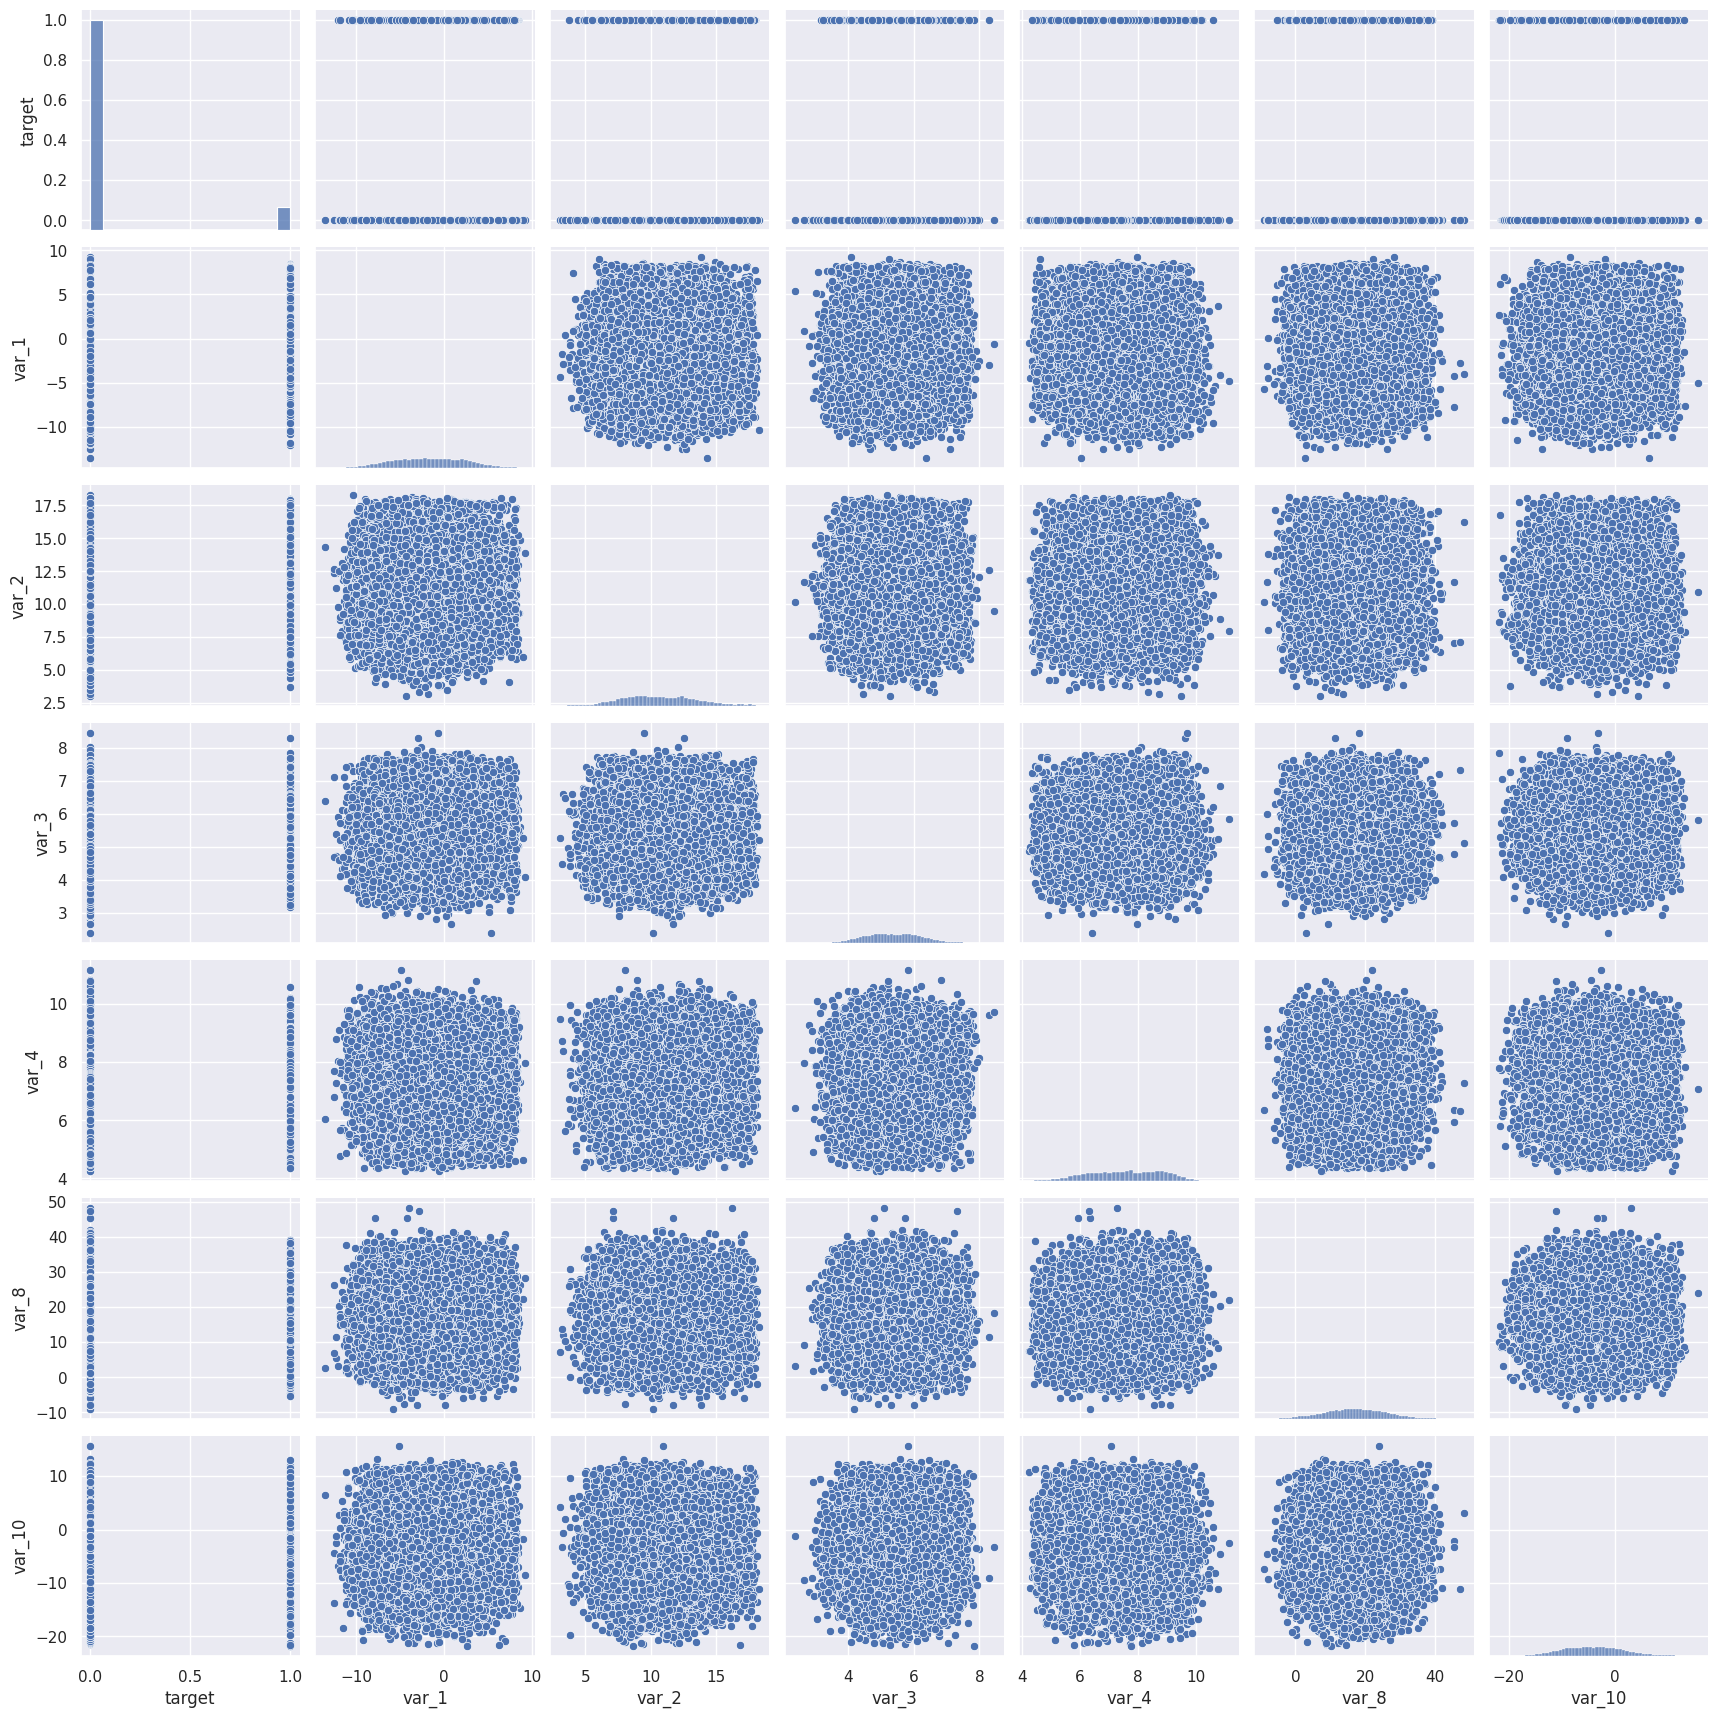

In [ ]:
# Sample a subset of the data (e.g., 10% of the data) and select a few features
project1_small3 = project1.sample(frac=0.1, random_state=42)
selected_features = ['target', 'var_1','var_2','var_3','var_4','var_8','var_10']

# Create the pairplot with the smaller subset and selected features
sns.pairplot(project1_small3[selected_features])
plt.show()

The above pairplot does not show any correlation between specific variables/features. Thus at this point 1) there is probably no specific reason to focus on certain columns and 2) there is no reason why random sampling should not continue to inform us as much as the full sample set.

           var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
var_0   1.000000 -0.009916  0.005876  0.010427  0.008213 -0.012209 -0.003966   
var_1  -0.009916  1.000000 -0.001881  0.015250 -0.009129 -0.004528  0.006760   
var_2   0.005876 -0.001881  1.000000  0.001048 -0.002907  0.002000 -0.016440   
var_3   0.010427  0.015250  0.001048  1.000000 -0.008574 -0.005335  0.008478   
var_4   0.008213 -0.009129 -0.002907 -0.008574  1.000000  0.000175 -0.000578   
var_5  -0.012209 -0.004528  0.002000 -0.005335  0.000175  1.000000  0.000879   
var_6  -0.003966  0.006760 -0.016440  0.008478 -0.000578  0.000879  1.000000   
var_7  -0.000894 -0.002195 -0.004611  0.006965  0.005137 -0.001194  0.010725   
var_8   0.001355  0.002398 -0.006107 -0.017544  0.008055  0.008733  0.003260   
var_9   0.004742 -0.003633 -0.005061 -0.013212 -0.008087 -0.006514 -0.000369   
var_10  0.000678  0.013128  0.000034  0.002121 -0.007828  0.001321 -0.011398   
var_11  0.003407 -0.000163  0.003449 -0.

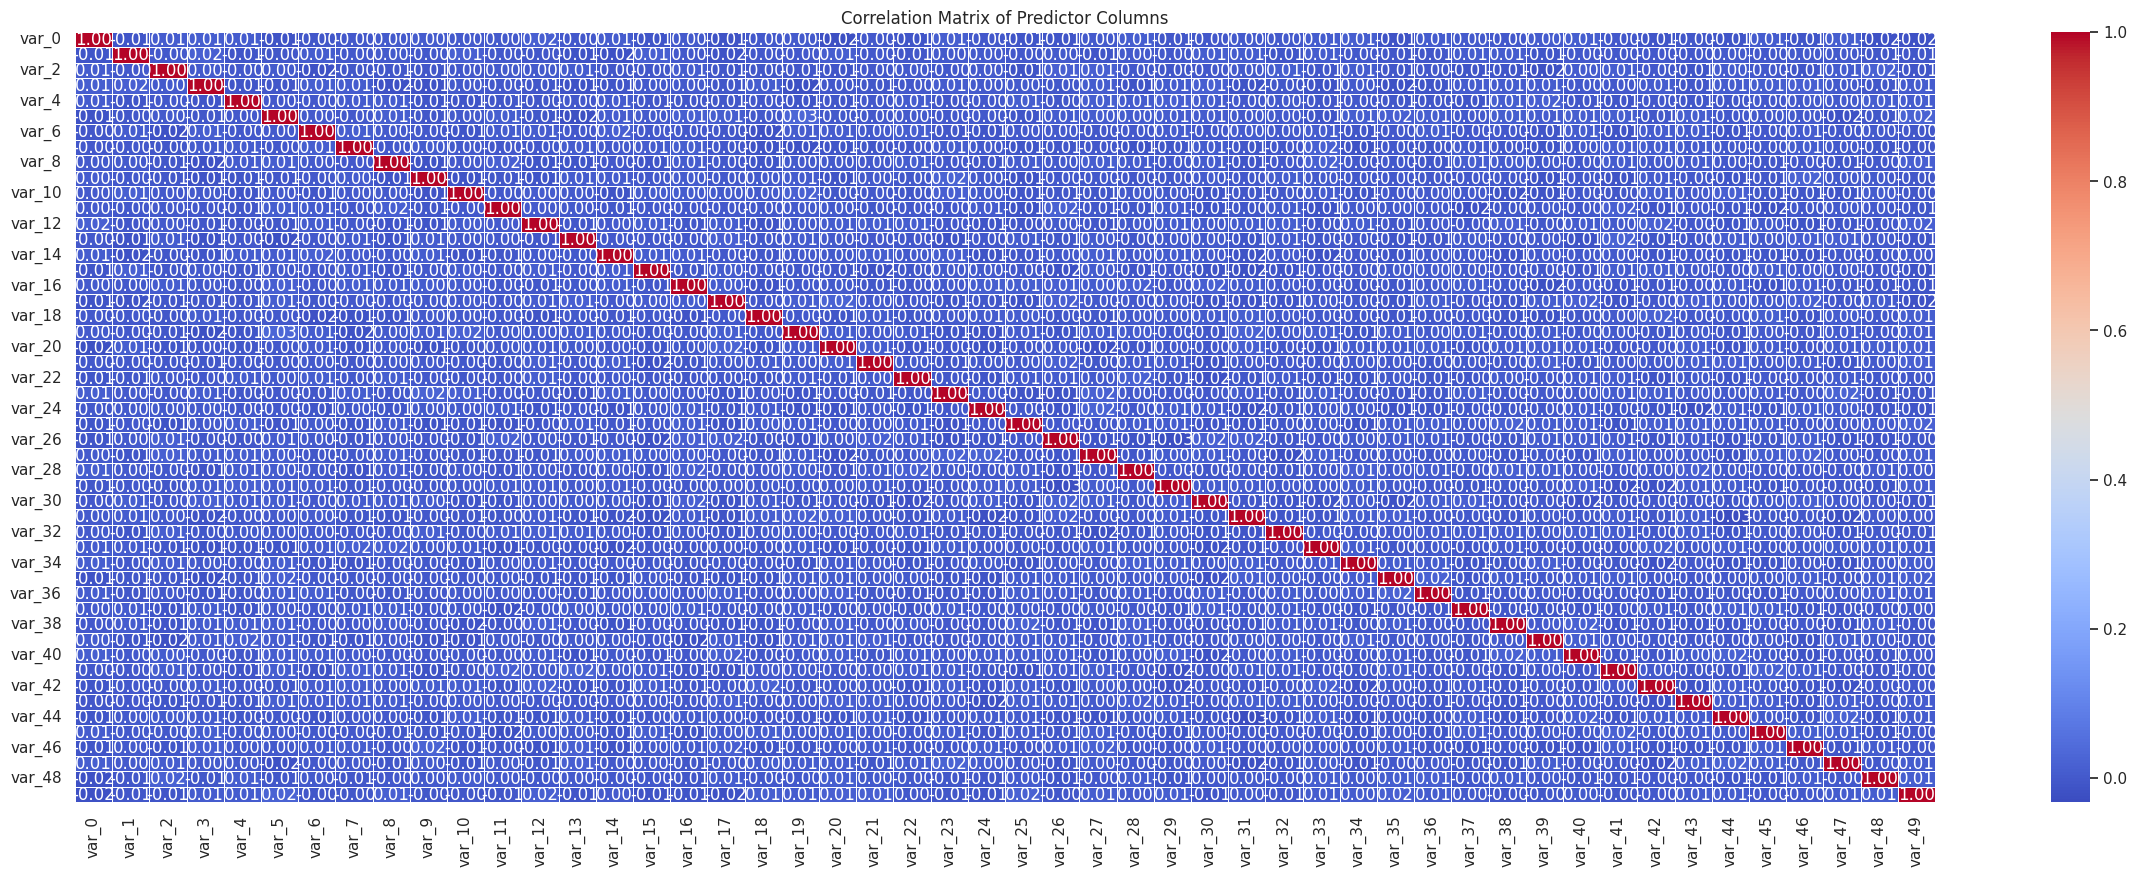

In [ ]:
#this will run the correlation plto heat map on the smaller random sampled set
predictor_columns = project1_small3.drop(columns=['target'])
corr_matrix = predictor_columns.corr()
print(corr_matrix)
plt.figure(figsize=(30,10))
sns.heatmap(corr_matrix, cmap='coolwarm',annot = True, fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Predictor Columns')
plt.show();

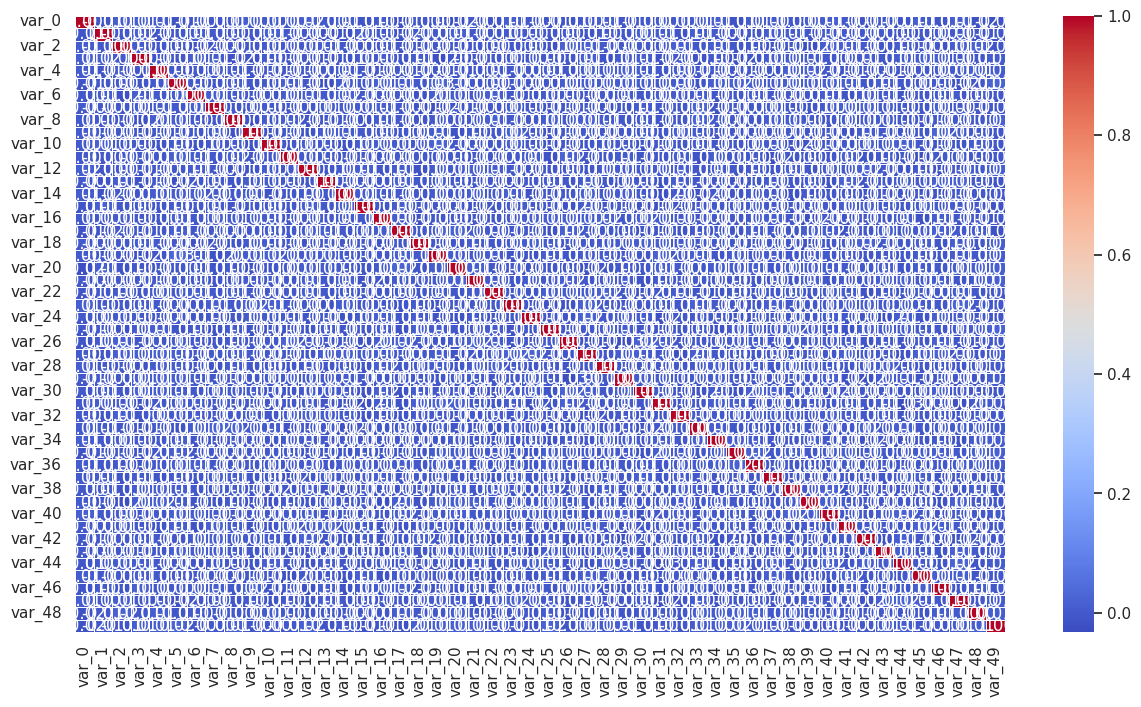

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

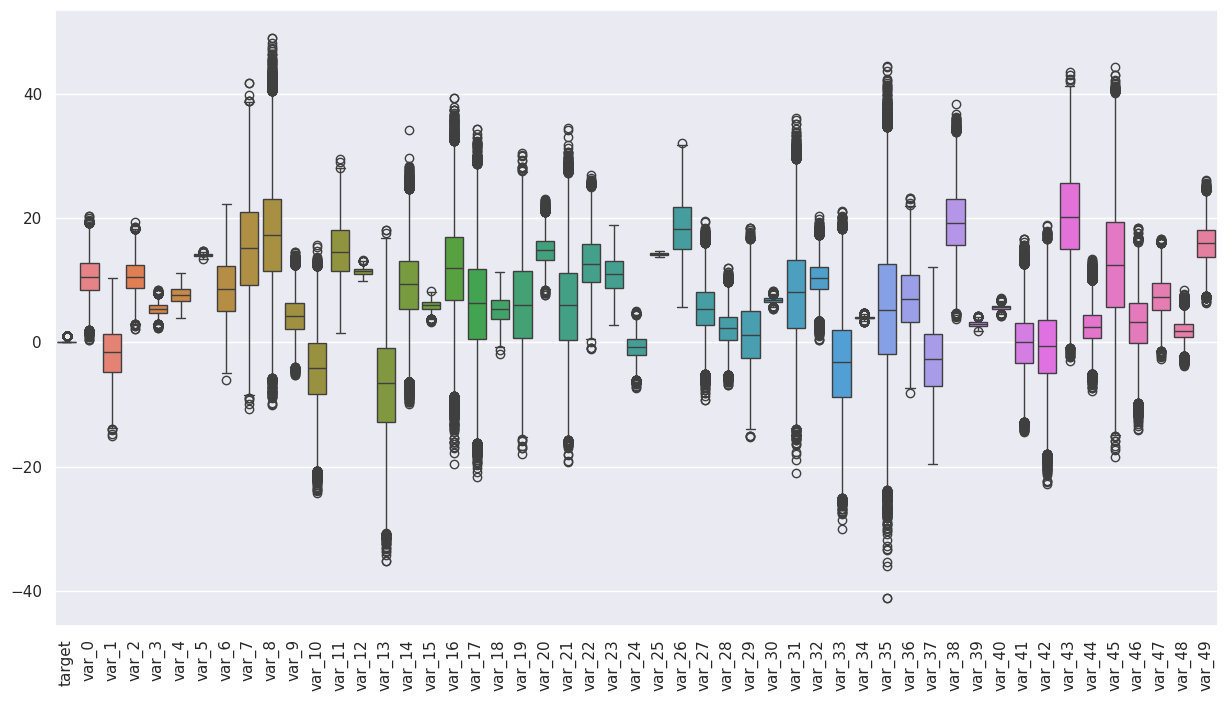

In [ ]:
# Boxplot for a random column
plt.figure(figsize=(15, 8))
sns.boxplot(data=project1)
plt.xticks(rotation=90)
plt.show()


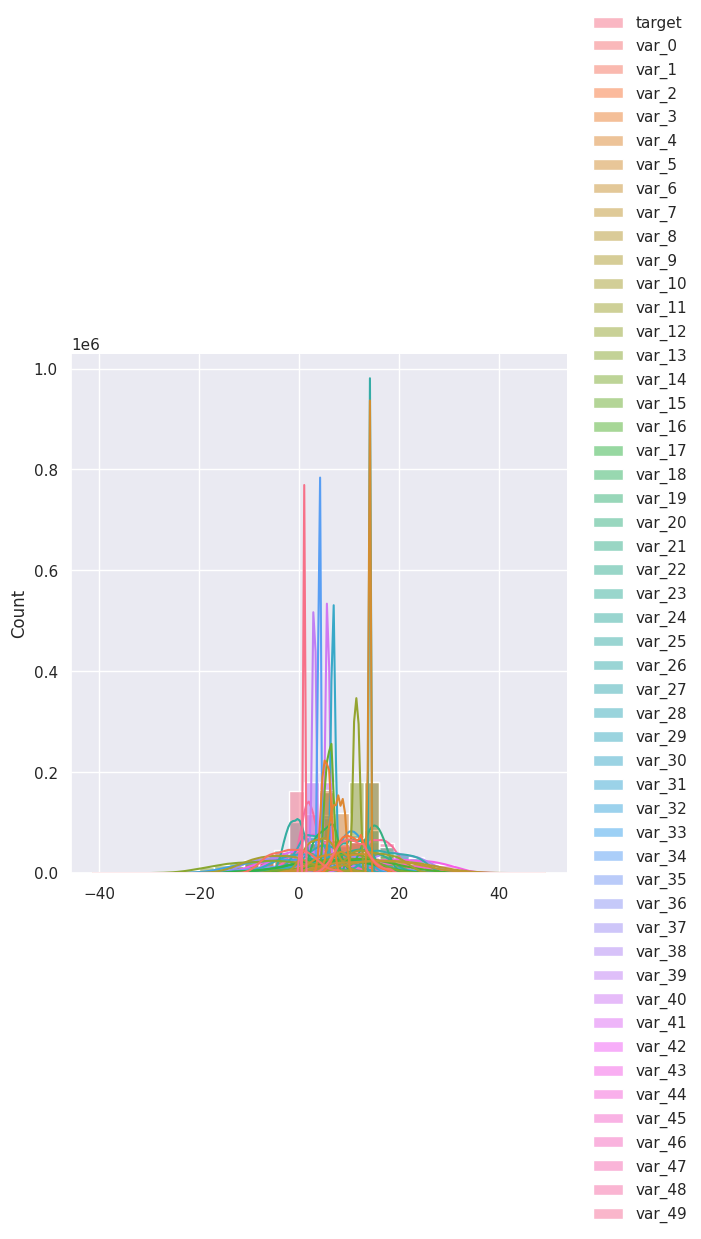

In [ ]:
    sns.displot(
    project1,
    color='green',
    kde=True,
    bins=30,  # Set number of bins for histogram
    height=6   # Set the height of the plot
)
plt.show()


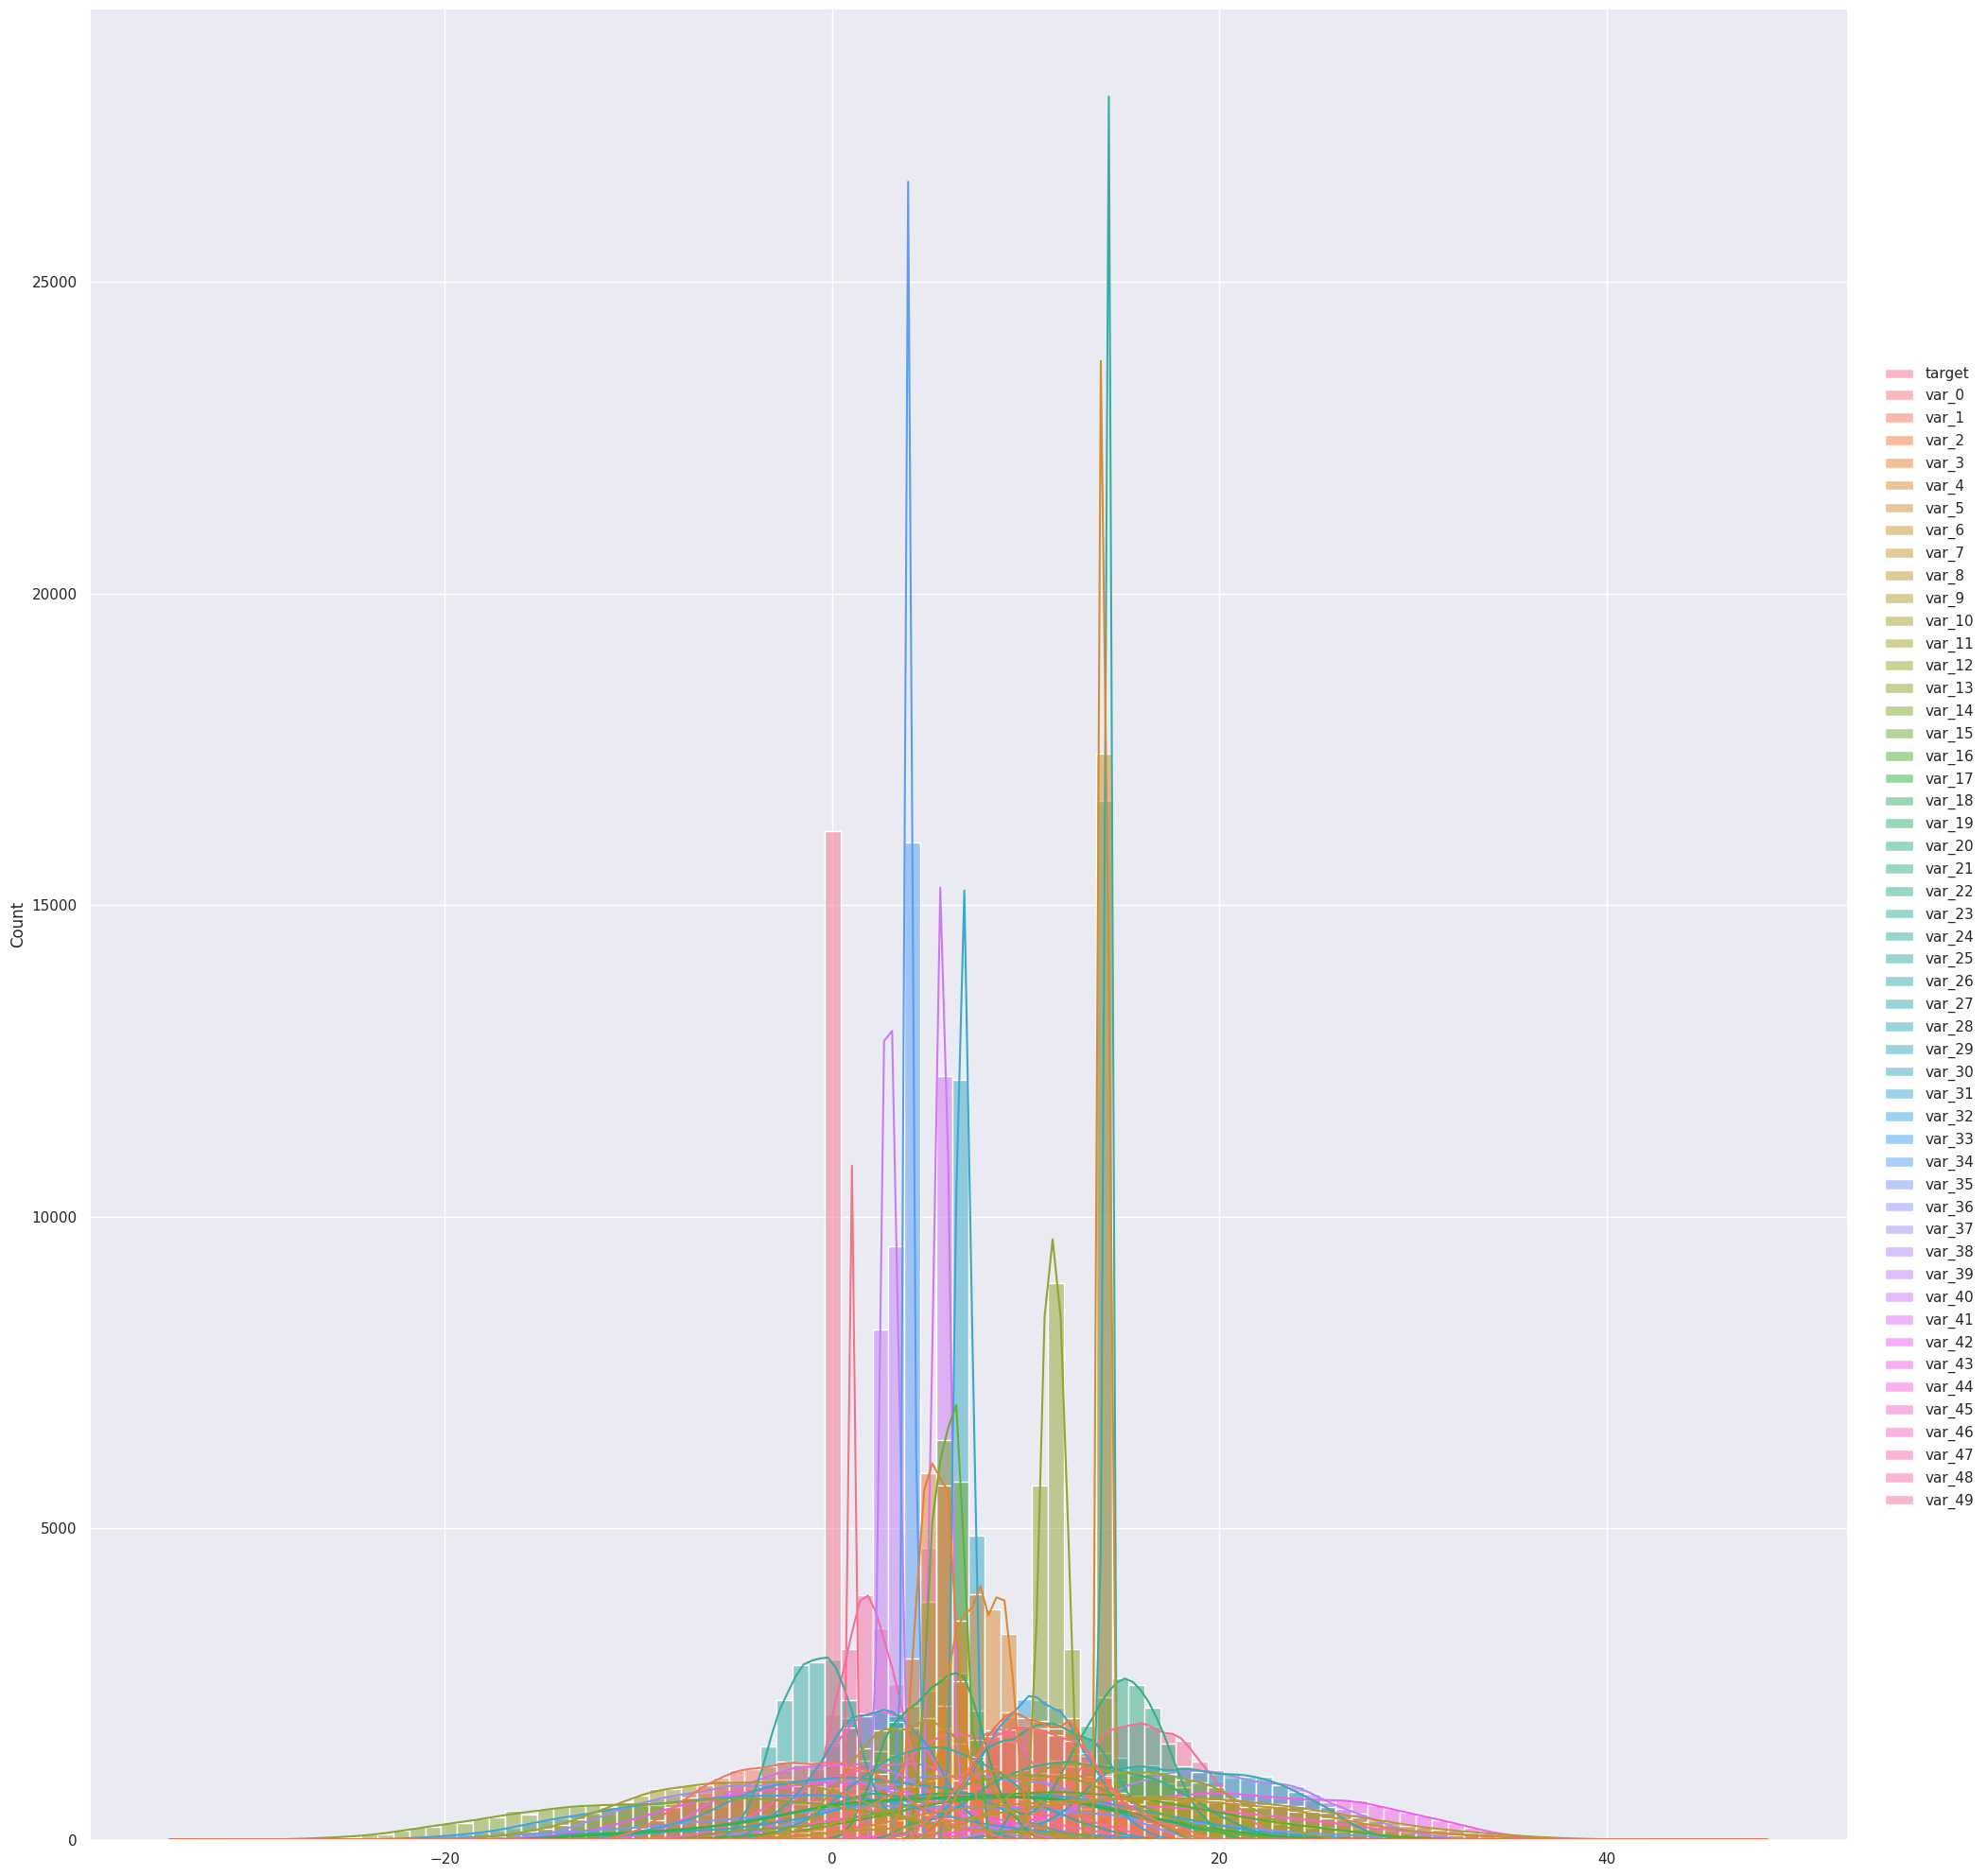

In [ ]:
    #this will run the same plot as above but on the smaller random sample set
    sns.displot(
    project1_small3,
    color='green',
    kde=True,
    bins=100,  # Set number of bins for histogram
    height=20,   # Set the height of the plot
)
plt.show()


<ipython-input-38-cb933d9903d3>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  sp.legend(title='target')
<ipython-input-38-cb933d9903d3>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  sp.legend(title='target')
<ipython-input-38-cb933d9903d3>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  sp.legend(title='target')
<ipython-input-38-cb933d9903d3>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  sp.legend(title='target')
<ipython-input-38-cb933d9903d3>:19: UserWarning: No artists with

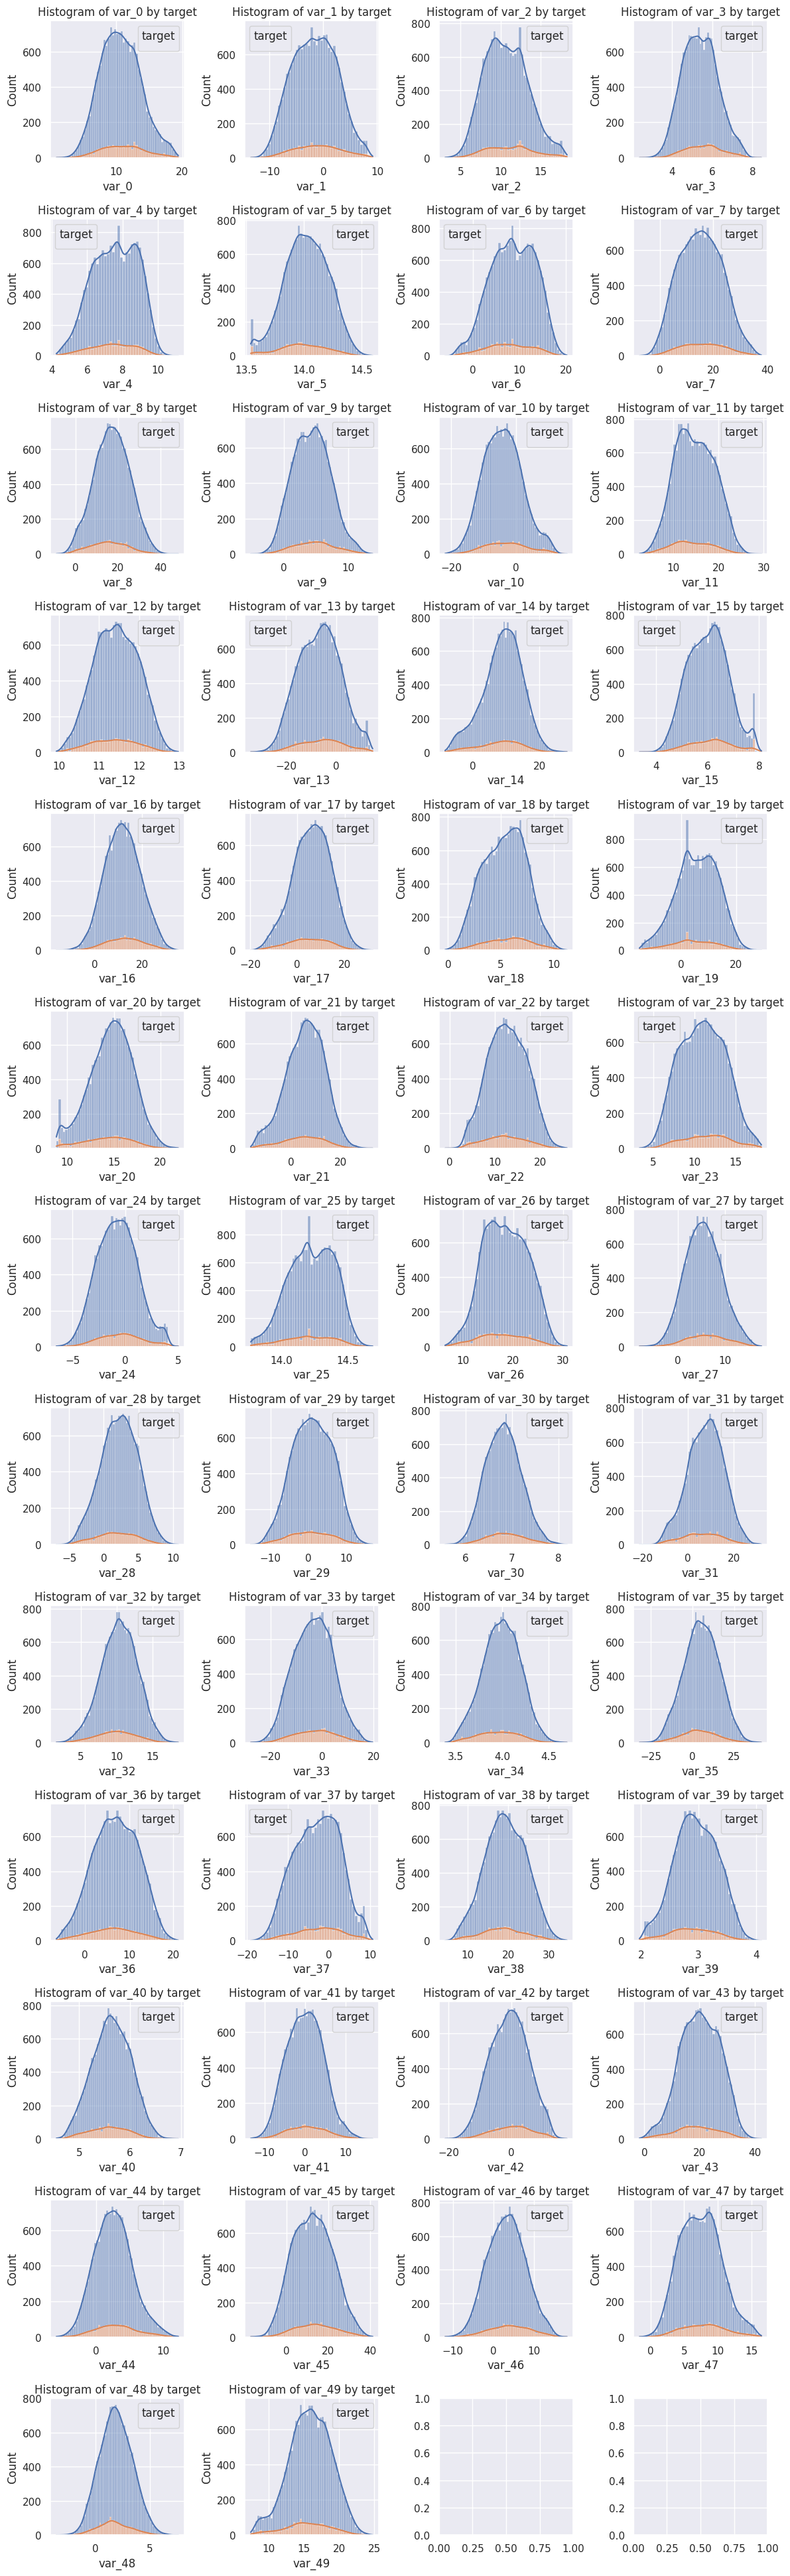

In [ ]:
columns = [col for col in project1_small3.columns if col.startswith('var_')]

# Set up subplots
n_cols = 4  # Number of columns in the plot grid (number of plots you will see in each column)
n_rows = len(columns) // n_cols + (1 if len(columns) % n_cols != 0 else 0)  # Number of rows in grid
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))  # Adjust figsize as necessary

# Flatten the axs array to make it easier to loop through
axs = axs.flatten()

# Loop over each filtered column and plot a histogram
for i, col in enumerate(columns):
    sp = axs[i]  # Select the corresponding subplot
    # Plot histogram, coloring by 'target'
    sns.histplot(data=project1_small3, x=col, hue='target', kde=True, ax=sp, multiple="stack")

    # Set a title for each subplot and add a legend
    sp.set_title(f'Histogram of {col} by target')
    sp.legend(title='target')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

target    1.000000
var_3     0.066924
var_27    0.064868
var_10    0.063565
var_15    0.062887
var_24    0.059306
var_9     0.059227
var_46    0.056902
var_2     0.055450
var_0     0.052904
var_30    0.052457
var_44    0.051110
var_1     0.049916
var_13    0.049072
var_18    0.048392
var_41    0.047948
var_23    0.047569
var_45    0.047543
var_47    0.045506
var_16    0.045281
var_7     0.044769
var_42    0.041593
var_33    0.040520
var_37    0.040147
var_21   -0.040311
var_29   -0.041987
var_4    -0.042073
var_48   -0.042765
var_36   -0.045513
var_11   -0.045516
var_22   -0.046433
var_25   -0.047005
var_35   -0.048198
var_14   -0.048623
var_28   -0.049551
var_40   -0.050049
var_26   -0.050278
var_49   -0.051718
var_12   -0.052324
var_34   -0.053733
var_6    -0.054375
var_38   -0.055704
var_19   -0.057320
var_39   -0.057373
var_8    -0.057378
var_17   -0.059906
var_43   -0.061291
var_32   -0.063871
var_5    -0.070015
var_31   -0.073296
var_20   -0.080689
Name: target, dtype: float64


<ipython-input-39-041813cd0461>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 [Text(0, 0, 'target'),
  Text(1, 0, 'var_3'),
  Text(2, 0, 'var_27'),
  Text(3, 0, 'var_10'),
  Text(4, 0, 'var_15'),
  Text(5, 0, 'var_24'),
  Text(6, 0, 'var_9'),
  Text(7, 0, 'var_46'),
  Text(8, 0, 'var_2'),
  Text(9, 0, 'var_0'),
  Text(10, 0, 'var_30'),
  Text(11, 0, 'var_44'),
  Text(12, 0, 'var_1'),
  Text(13, 0, 'var_13'),
  Text(14, 0, 'var_18'),
  Text(15, 0, 'var_41'),
  Text(16, 0, 'var_23'),
  Text(17, 0, 'var_45'),
  Text(18, 0, 'var_47'),
  Text(19, 0, 'var_16'),
  Text(20, 0, 'var_7'),
  Text(21, 0, 'var_42'),
  Text(22, 0, 'var_33'),
  Text(23, 0, 'var_37'),
  Text(24, 0, 'var_21'),
  Text(25, 0, 'var_29'),
  Text(26, 0, 'var_4'),
  Text(27, 0, 'var_48'),
  Text(28, 0, 'var_3

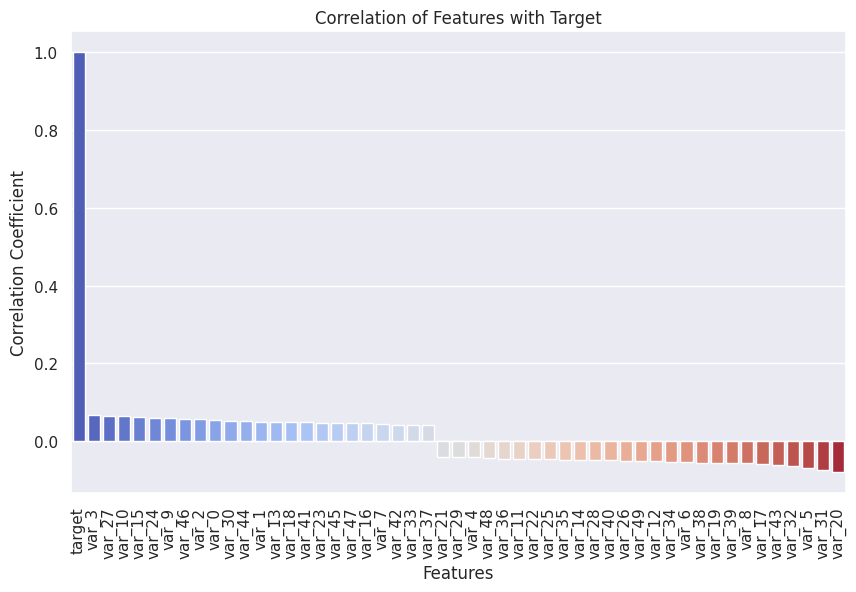

In [ ]:
correlation_with_target = project1.corr()['target'].sort_values(ascending=False)
print(correlation_with_target)

# Plot a barplot to visualize the correlation with the target variable
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')
plt.title('Correlation of Features with Target')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)  # Rotate feature names for better readability

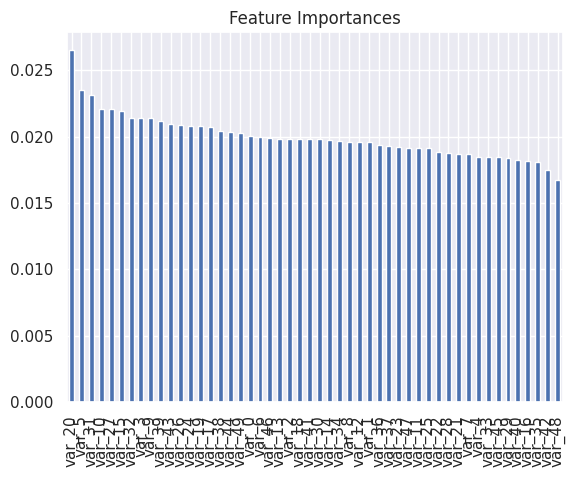

In [ ]:
#because we are completly unsure of what variables/features are important that we might put into the NB ML function we can use the randomforest classifier to rank each one based on importance.
from sklearn.ensemble import RandomForestClassifier

# Assuming you have a target variable
X = project1.drop('target', axis=1)
y = project1['target']

# Train a random forest model to get feature importance
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot the feature importances
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()

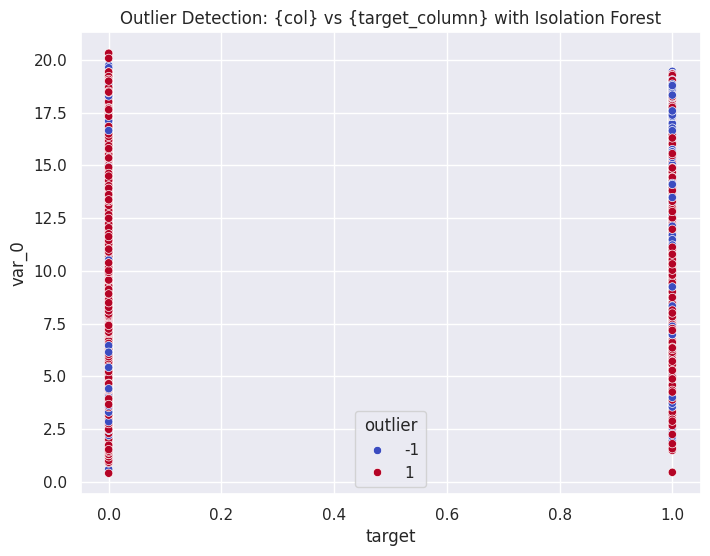

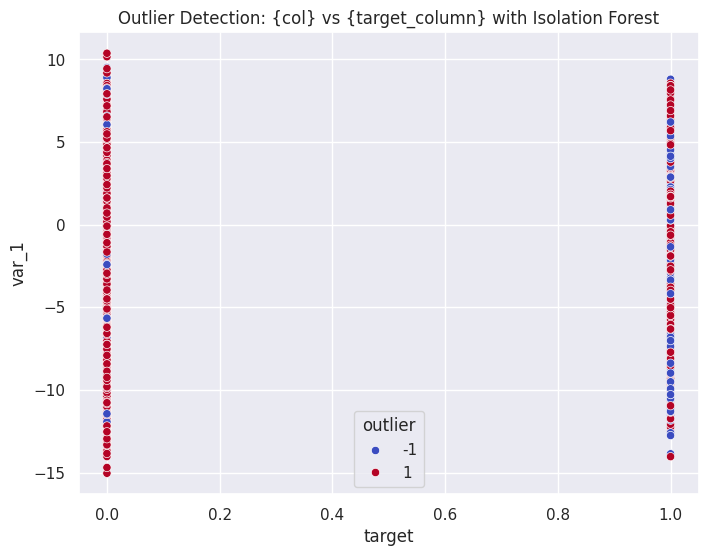

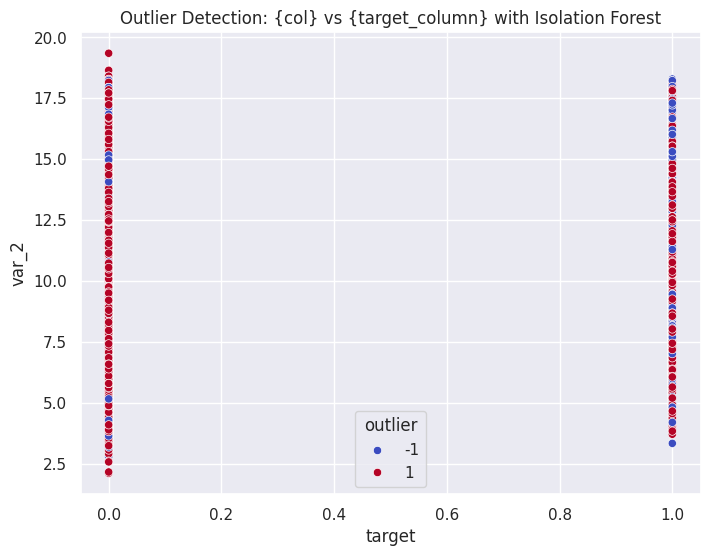

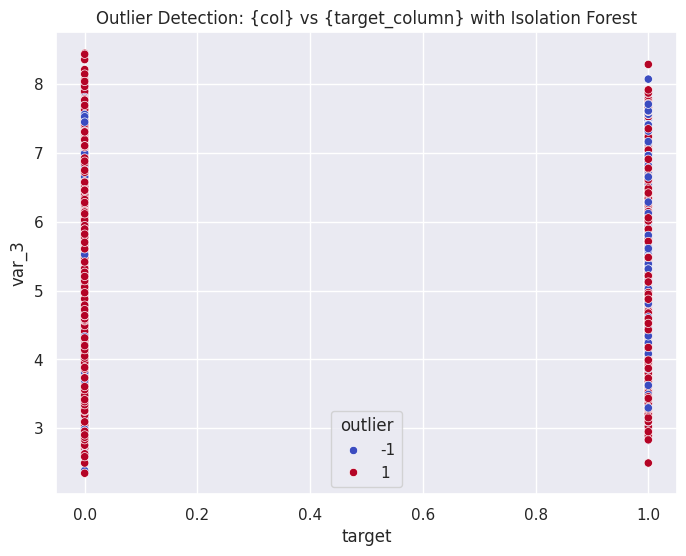

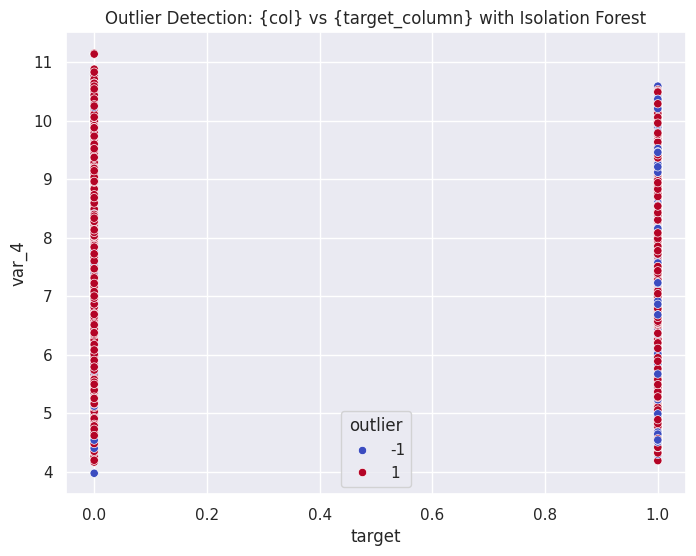

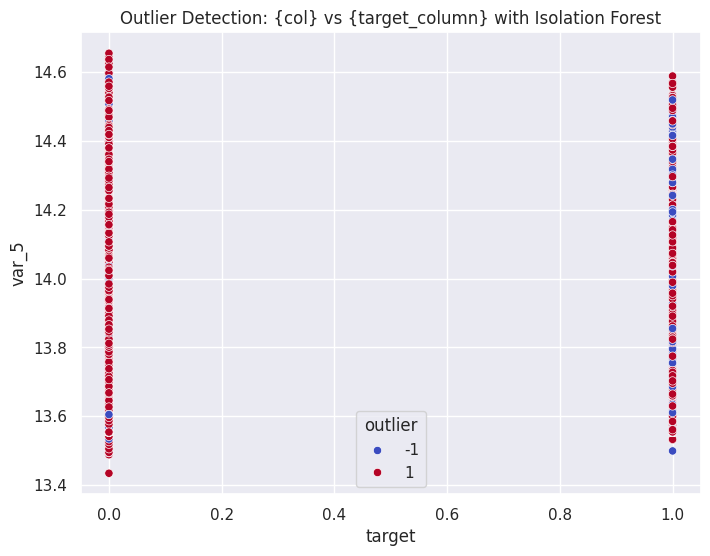

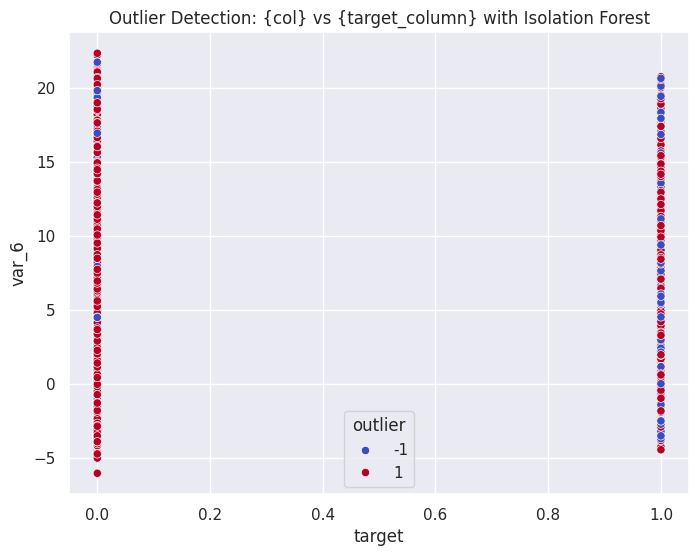

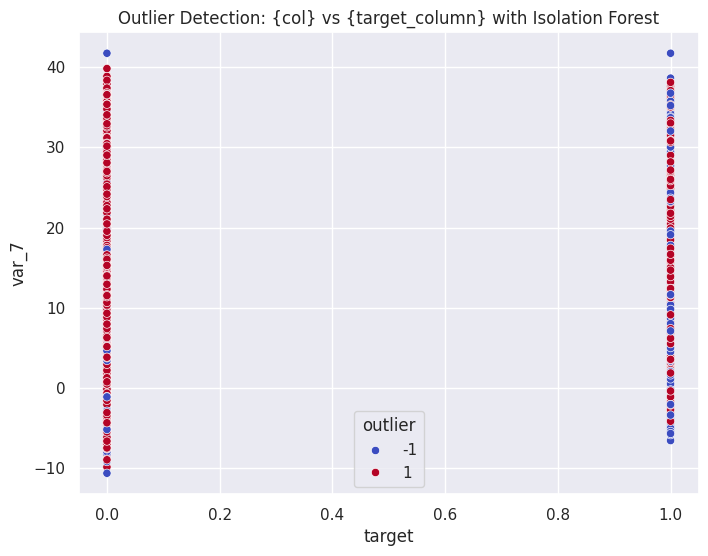

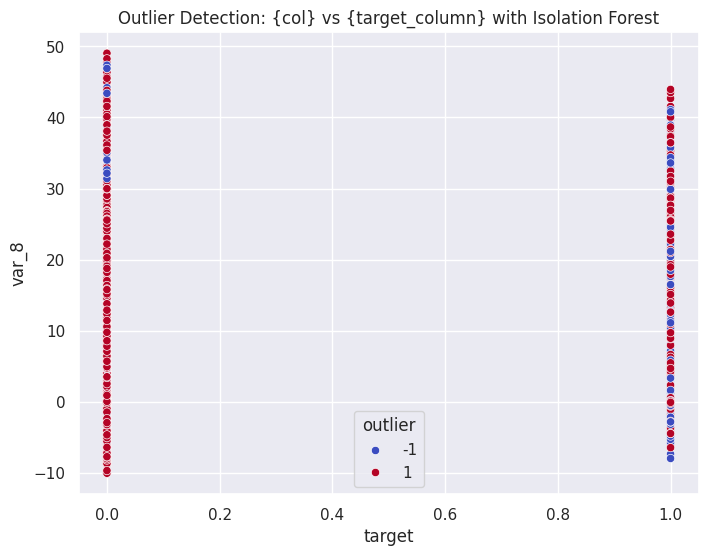

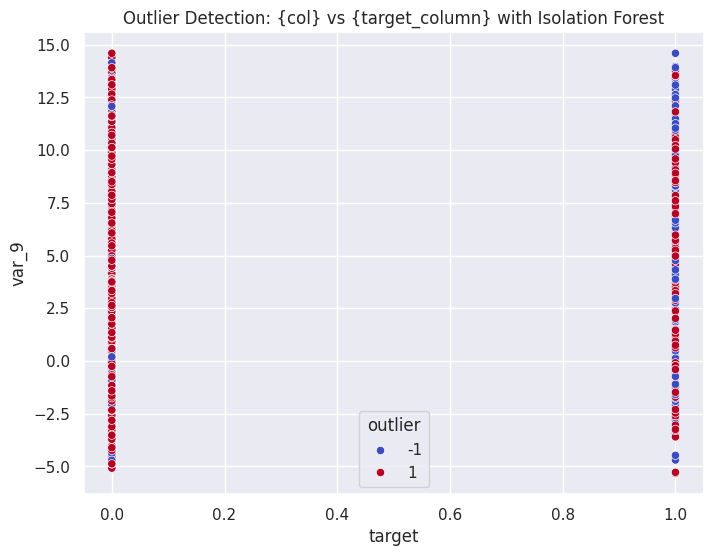

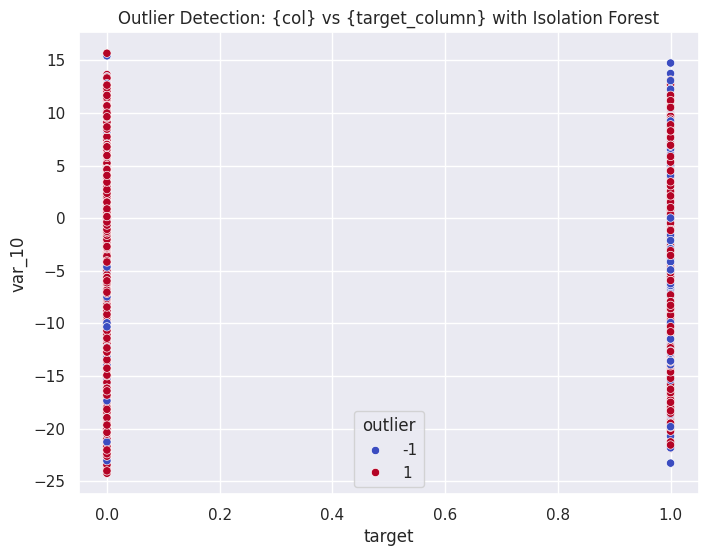

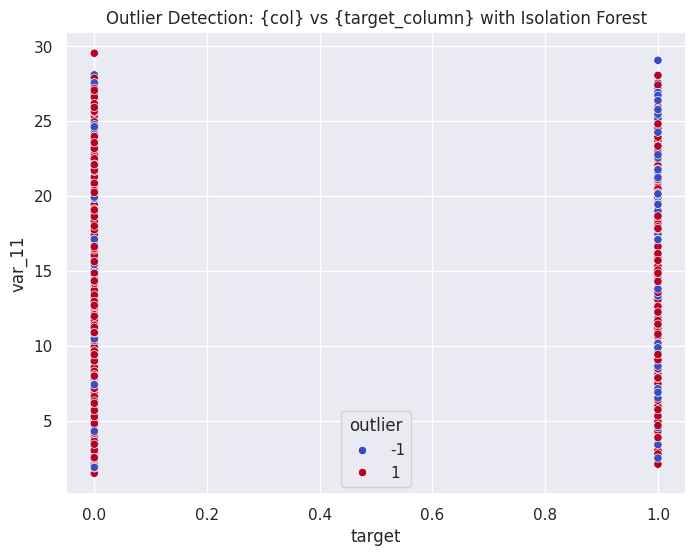

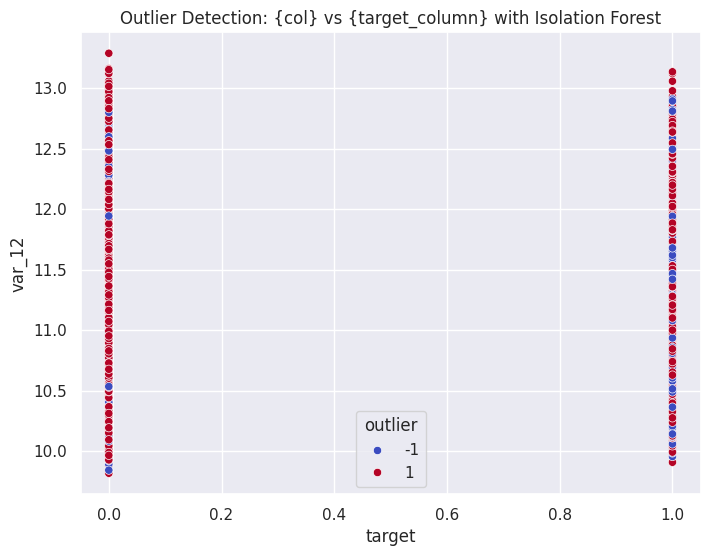

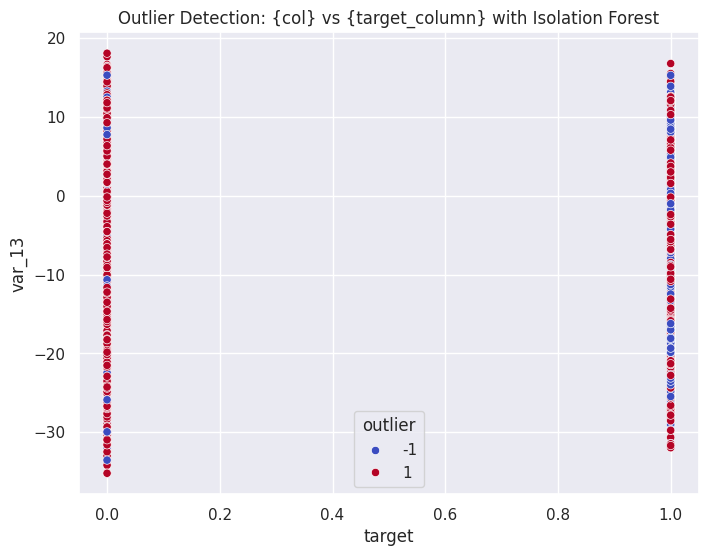

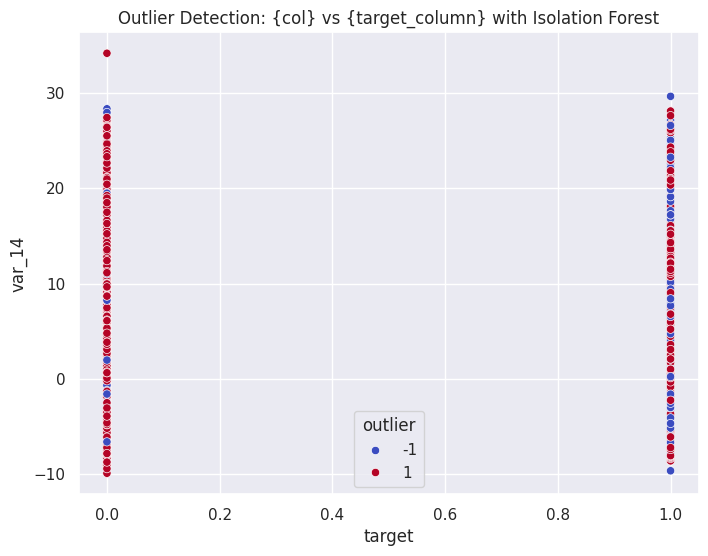

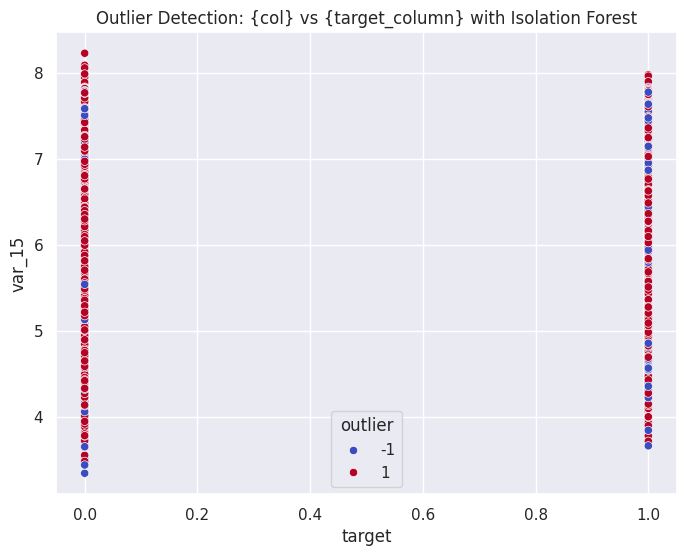

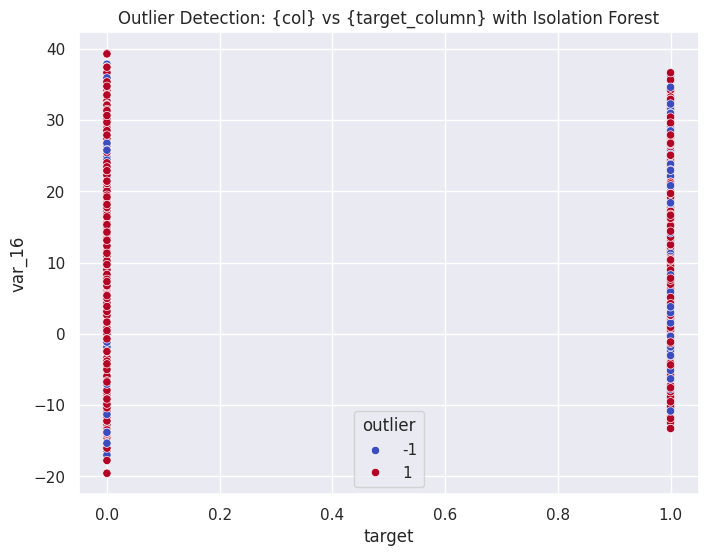

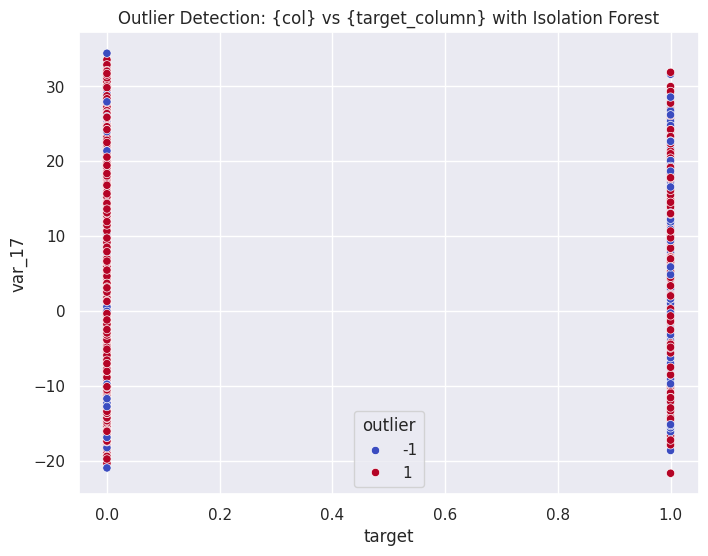

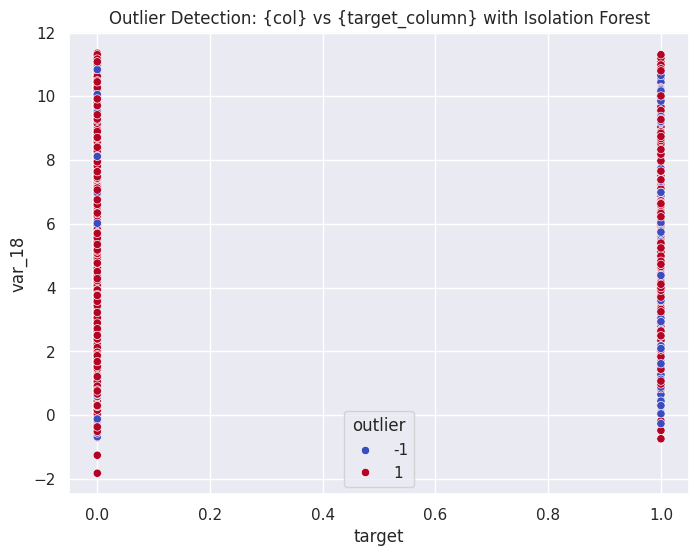

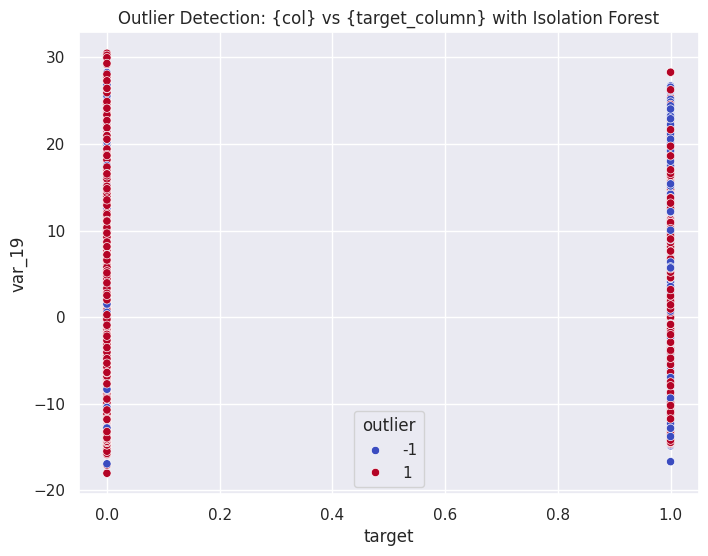

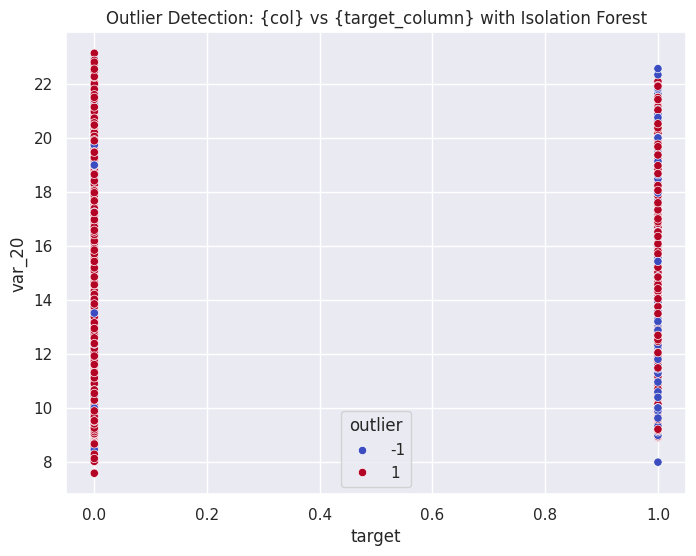

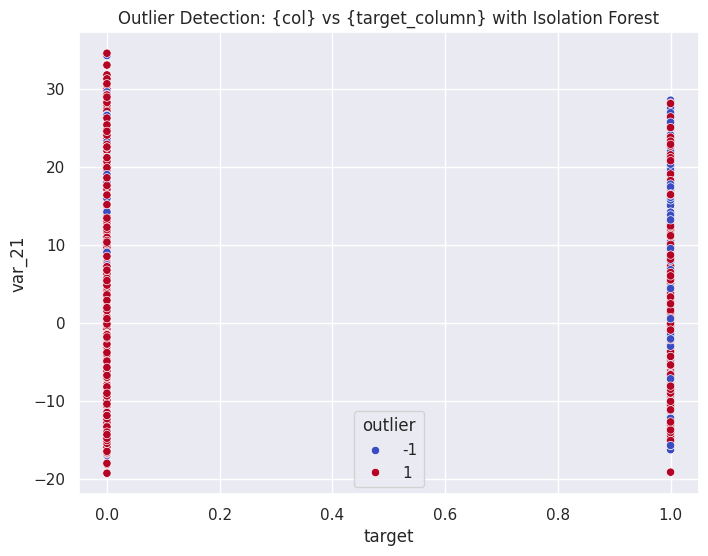

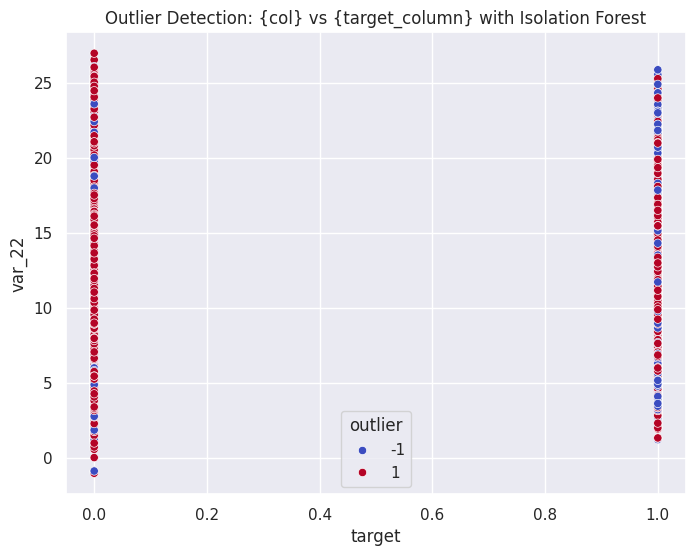

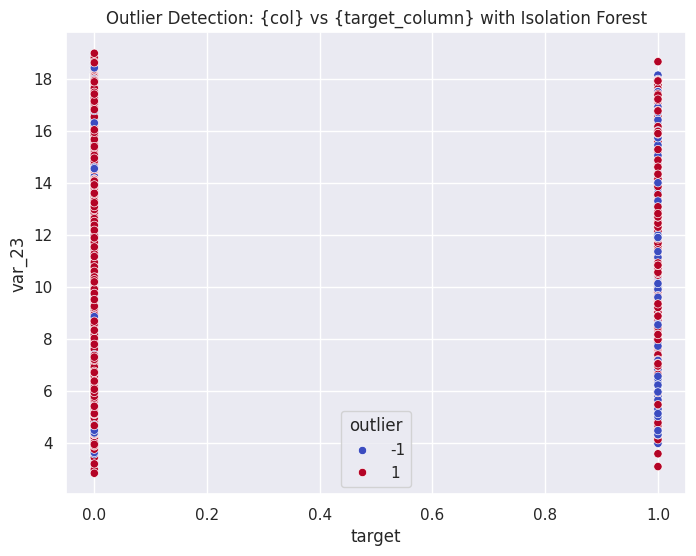

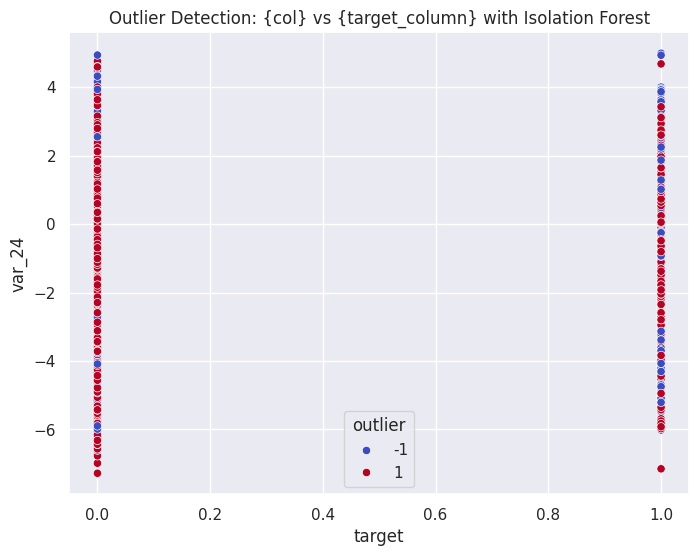

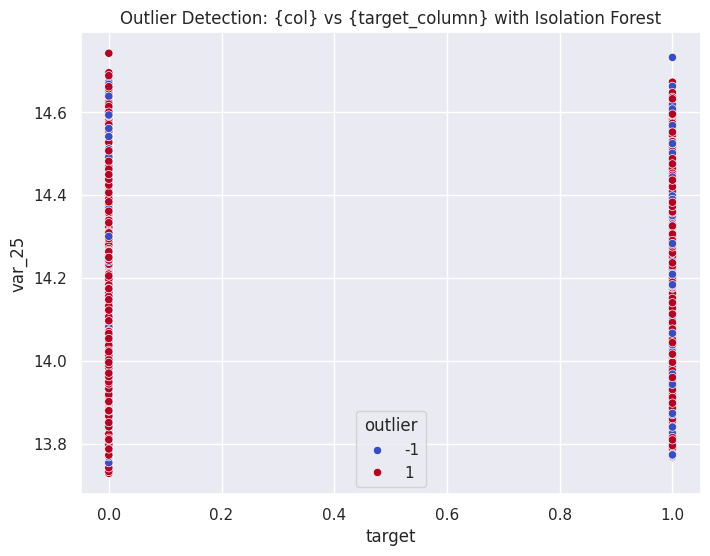

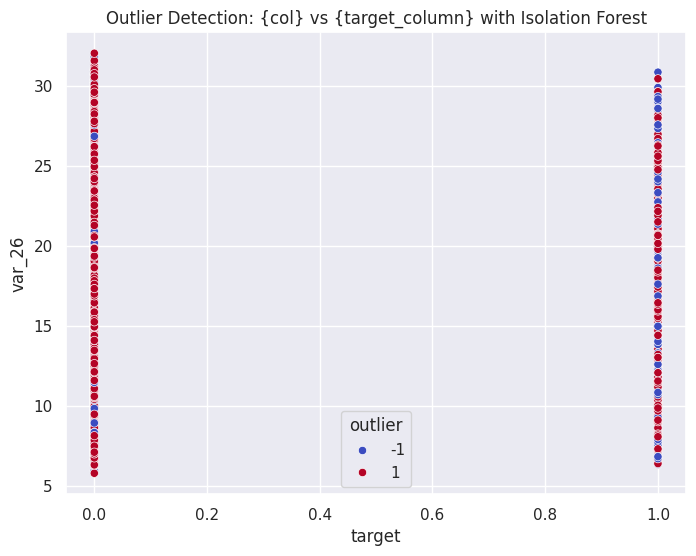

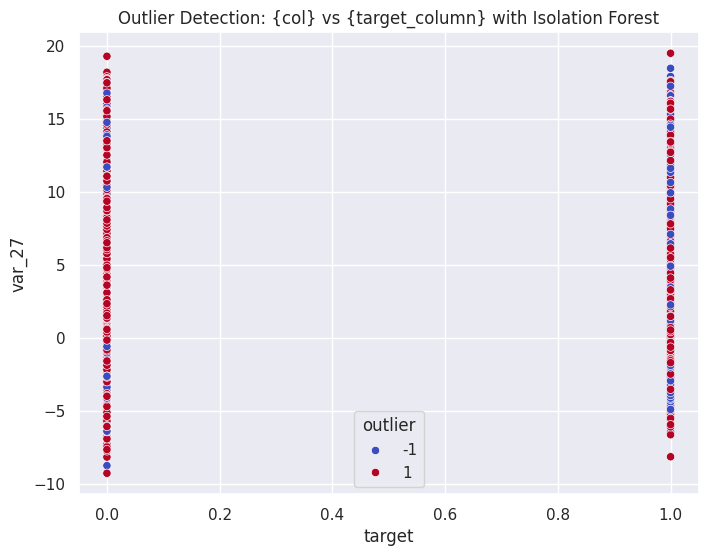

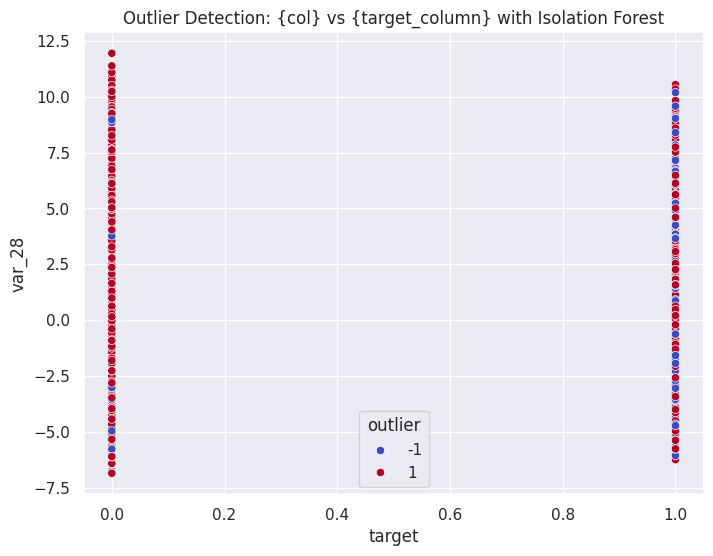

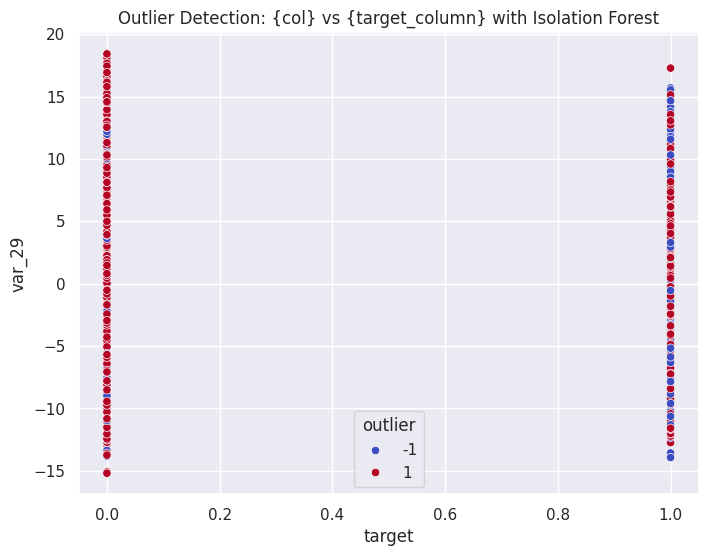

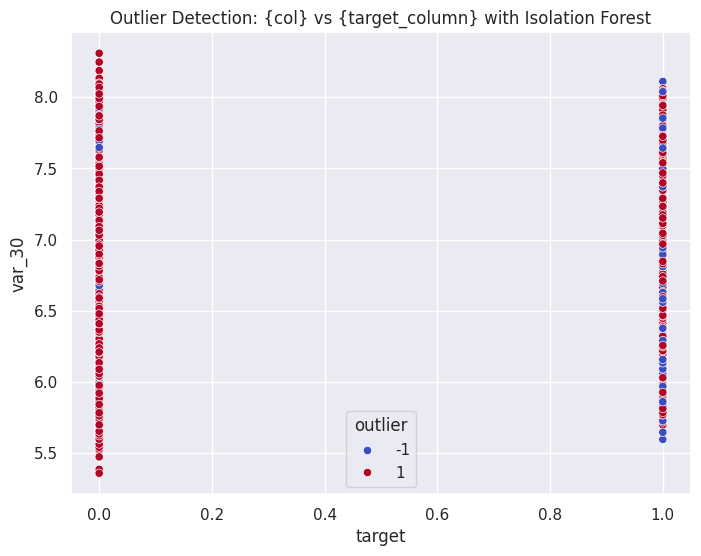

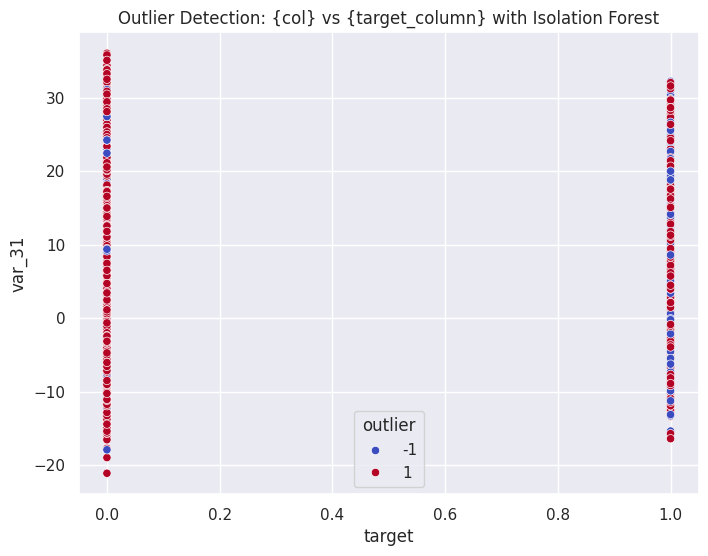

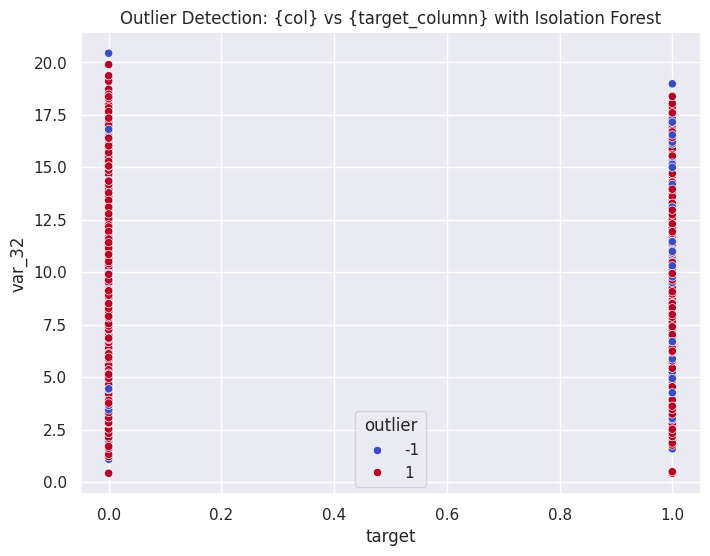

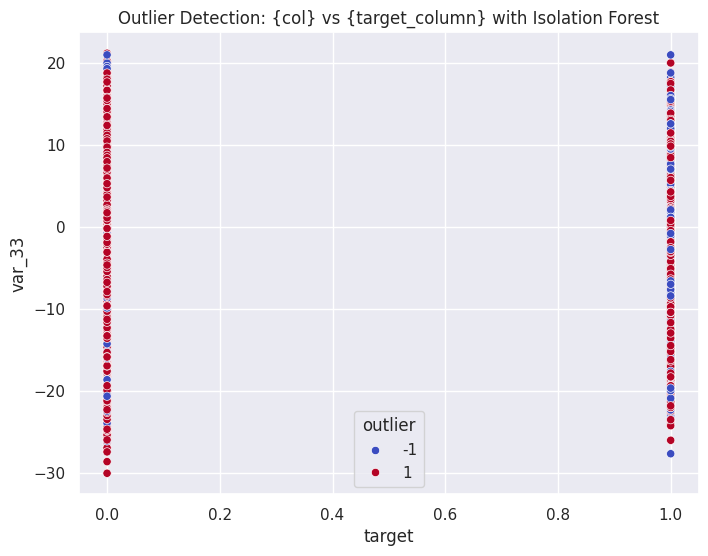

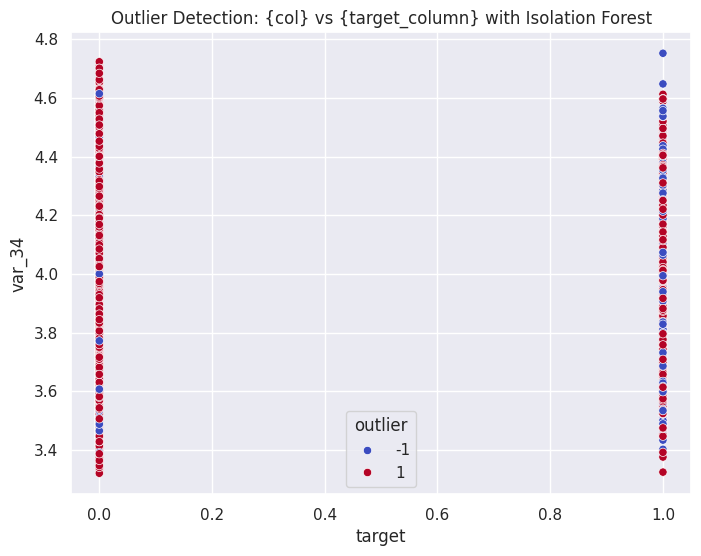

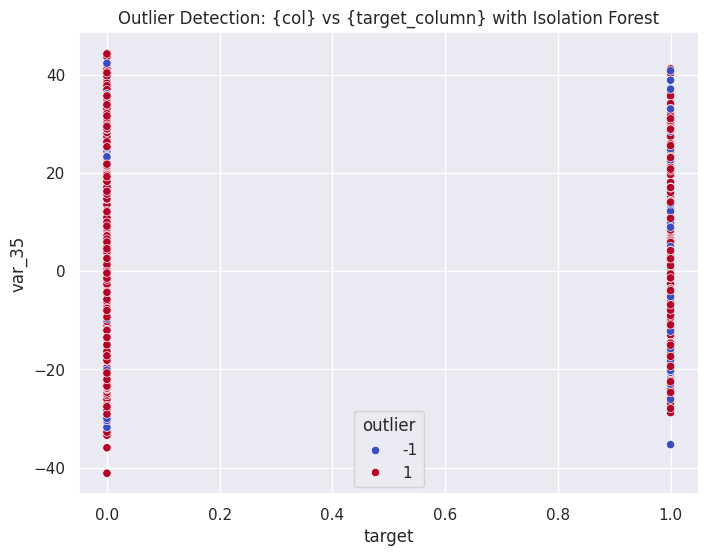

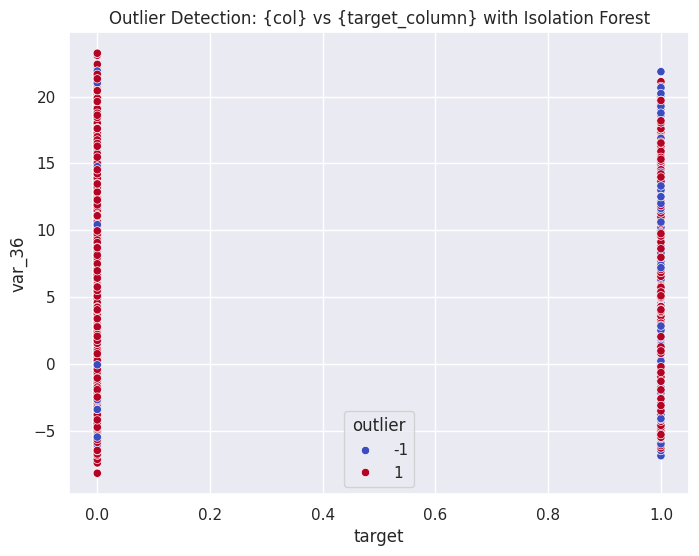

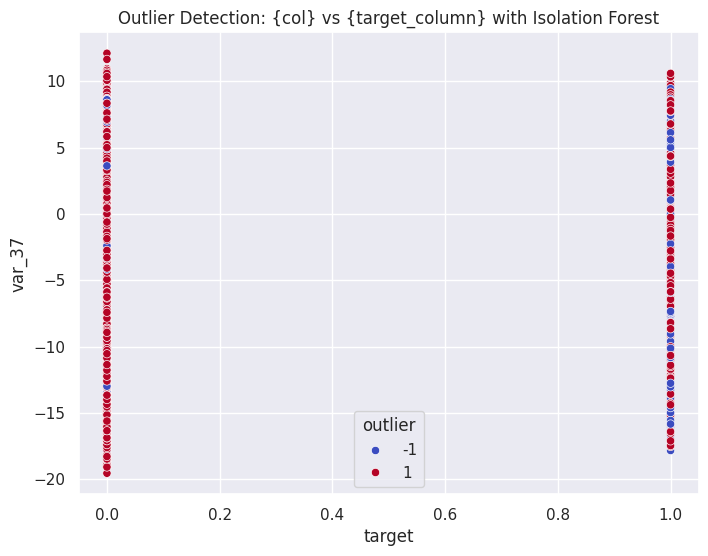

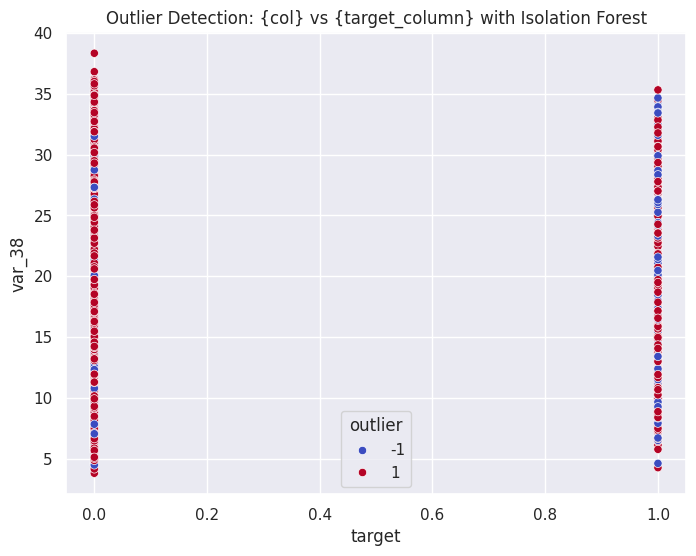

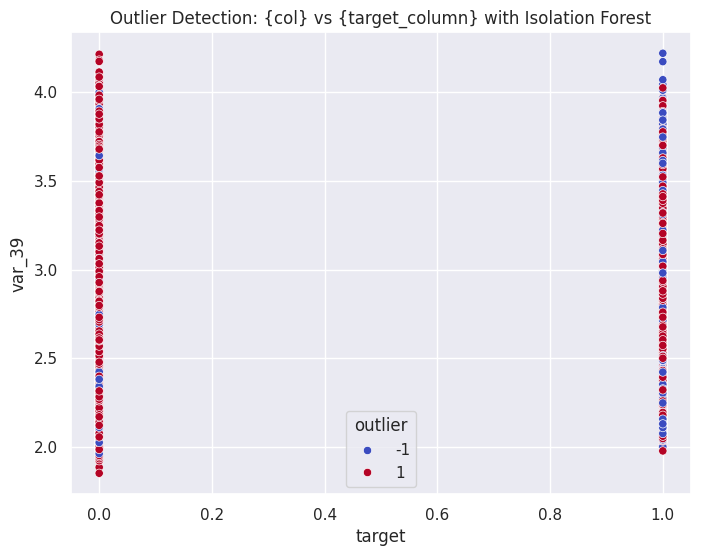

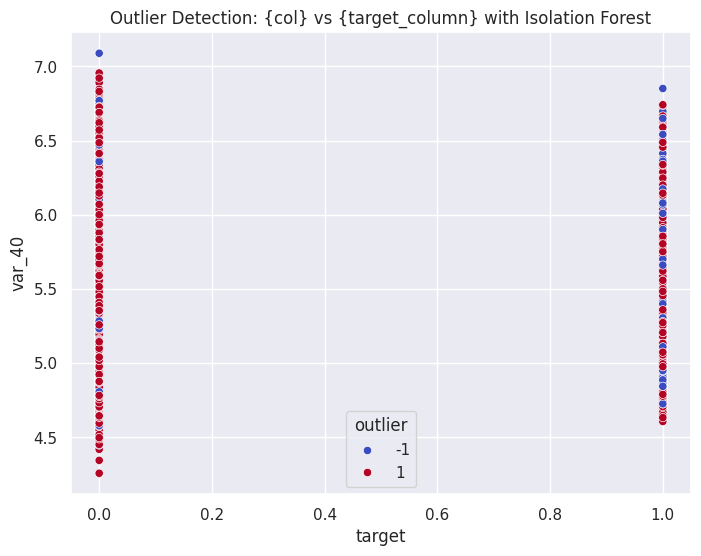

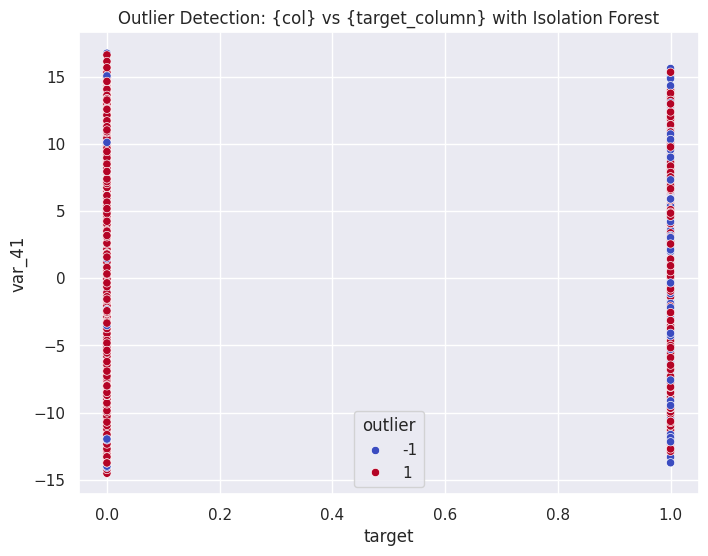

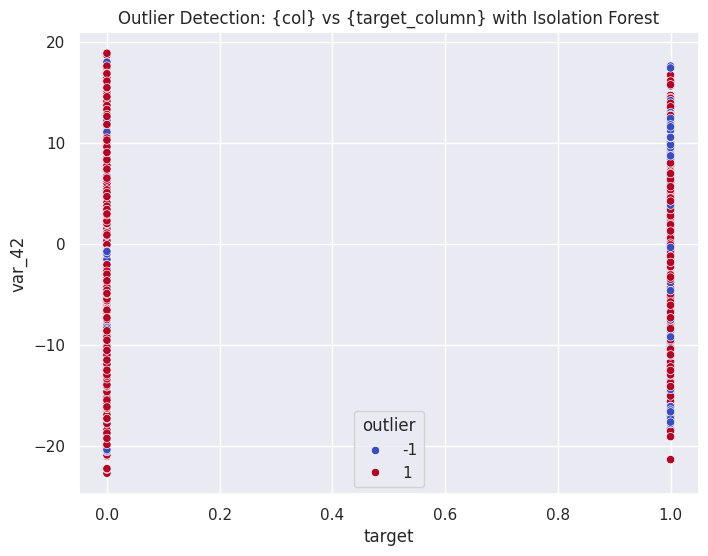

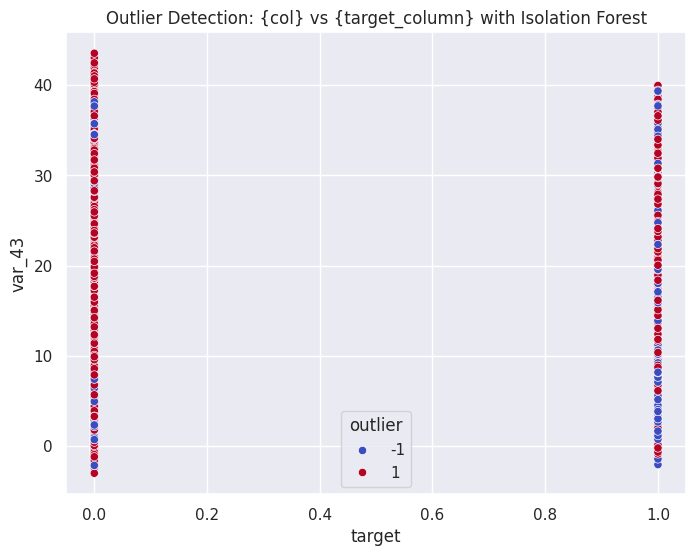

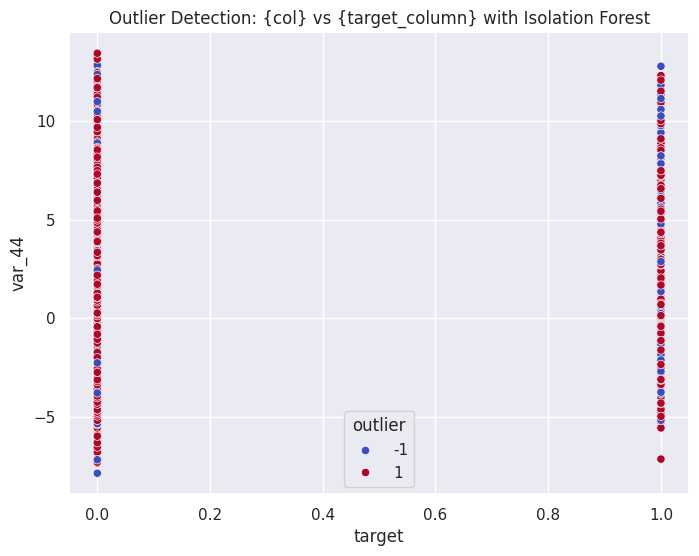

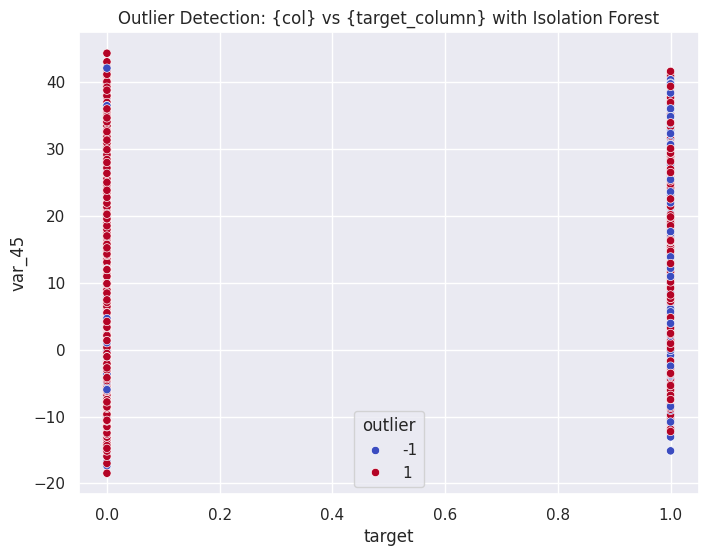

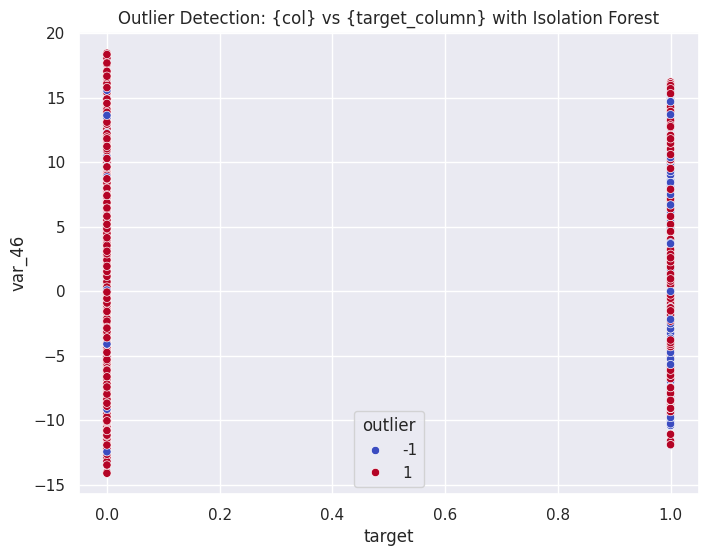

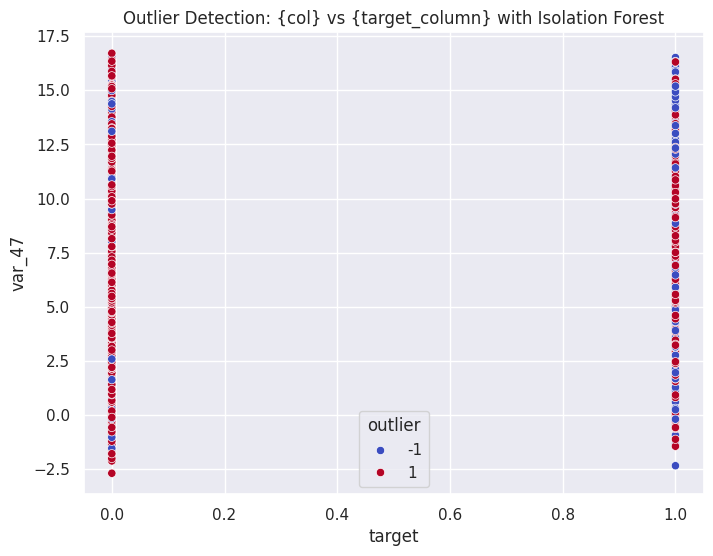

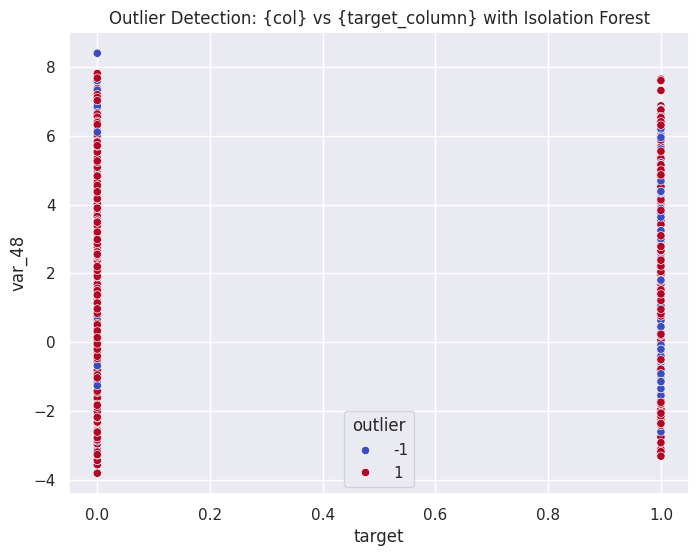

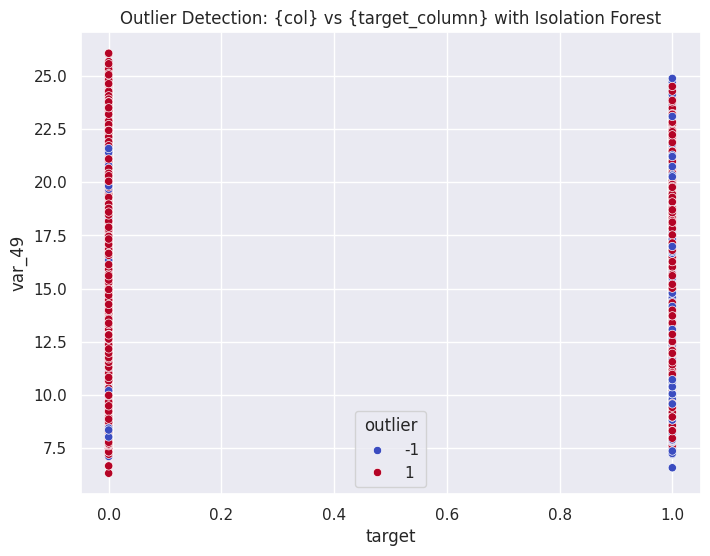

In [ ]:
#The script below usese IsolationForest to detect anomolies/outliers in the data
#from the results 1 will indicate the data in normal and behaves similarly to the other data
#While -1 represents and anomoly/outlier because it behavies differently from the rest of the data
from sklearn.ensemble import IsolationForest

#this is my target column aka 'target'
target_column = 'target'


# Initialize the model
iso_forest = IsolationForest(contamination=0.1)

# Fit the model to the data
outliers = iso_forest.fit_predict(project1.drop(columns=[target_column]))

# Convert the result to a DataFrame
project1['outlier'] = outliers

# Plot the data, highlighting outliers
for col in project1.columns:
    if col != target_column and col != 'outlier':
      plt.figure(figsize=(8, 6))
      sns.scatterplot(x=project1[target_column], y=project1[col], hue='outlier', data=project1, palette='coolwarm')
      plt.title('Outlier Detection: {col} vs {target_column} with Isolation Forest')
      plt.xlabel(target_column)
      plt.ylabel(col)
      plt.show()

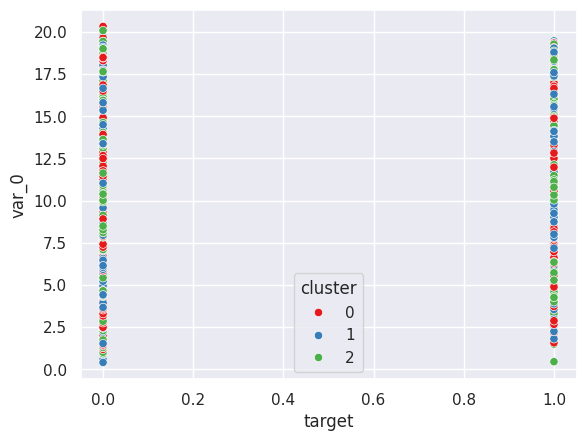

In [ ]:
#similar to the analysis aboove but much simpliler
from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)  # Choose the number of clusters
project1['cluster'] = kmeans.fit_predict(project1)

# Plot the clusters (you can visualize the first two columns, for example)
sns.scatterplot(x=project1.columns[0], y=project1.columns[1], hue='cluster', data=project1, palette='Set1')
plt.show()

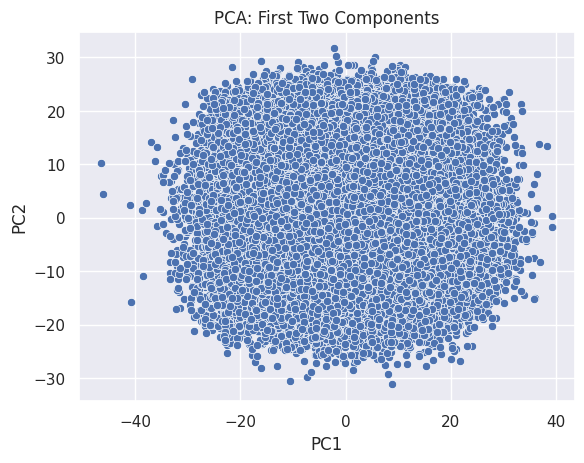

In [ ]:
#PCA analysis for lowering dimensionality of the data. This may help with the anonmity of the data and finding some sort of important variables
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(project1)

# Create a DataFrame for PCA results
pca_project1 = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])

# Plot the PCA components
sns.scatterplot(x='PC1', y='PC2', data=pca_project1)
plt.title('PCA: First Two Components')
plt.show()


In [ ]:
project1_target_1 = project1[project1['target'] == 1]
project1_target_0 = project1[project1['target'] == 0]

###Exploratory Conclusion

Overall, the data does not show any specific corrlation between the target column and any of the var feature columns. Thus at this point I do not have any specific reason to remove or ignor any of the columns.

##Data Processing

### Gaussian Naive Bayes Model


Create the GNB model.

In [ ]:
gnb = GaussianNB() #This is to create the empty GNB model that will be added to below.

Next we'll separate our features and targets.

In [ ]:
targets = project1['target'].copy() #y is the target column for the training, aka 'target'
predictors = project1.drop('target', axis=1, inplace=False) #x is the feature data that will be used to train the model. AKA all 'Var_' columns

Then we'll train the model and see how it does.

In [ ]:
#we will create 4 dataframes: two (train and test) for the predictor features and two (train and test) for the target features
predictors_train, predictors_test, targets_train, targets_test = train_test_split(predictors, targets, test_size=0.20, random_state=0)

#next we will plug the training data into the GNB model and use the fit function to create a predictive model
gnb.fit(predictors_train, targets_train)

#now that we have a predictive GNB model we will then input using the predict function our predictor test set into the funct to get a target output
targets_pred = gnb.predict(predictors_test)

#Does the target output that was predicted by the GNB model match the target test set? and by how much is it off? This is what will be provided below for us.
print("Number of mislabeled points out of a total %d points : %d"
      % (predictors_test.shape[0], (targets_test != targets_pred).sum()))

Number of mislabeled points out of a total 36000 points : 4929


We now know how many of the point did not match the target_test set. Which gives us an idea of how 'off' our predictive model is.

###GNB Predictive Model Metrics

In [ ]:
# We can do some additional calculations to determine accuracy, precision, recall, and F1-Score
#Accuracy gives us information on the models performace
#Precision gives us the number of pos pred that were actually true pos
# Recall gives us the number of pos that were correctly identified
# F1-Score is how to determine the balance of FP and FN in the model.



# Import necessary libraries needed to calclate the different metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report

# Assuming 'y_test' is your true labels and 'y_pred' is your model's predictions
# Example with Gaussian Naive Bayes model from previous example
accuracy = accuracy_score(targets_test, targets_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate Precision, Recall, and F1-Score
precision = precision_score(targets_test, targets_pred)
recall = recall_score(targets_test, targets_pred)
f1 = f1_score(targets_test, targets_pred)

# Print Precision, Recall, and F1-Score
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Optionally, display confusion matrix and full classification report
print("\nConfusion Matrix:")
print(confusion_matrix(targets_test, targets_pred))

print("\nClassification Report:")
print(classification_report(targets_test, targets_pred))


Accuracy: 0.8631
Precision: 0.3168
Recall: 0.3120
F1-Score: 0.3144

Confusion Matrix:
[[29941  2437]
 [ 2492  1130]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     32378
           1       0.32      0.31      0.31      3622

    accuracy                           0.86     36000
   macro avg       0.62      0.62      0.62     36000
weighted avg       0.86      0.86      0.86     36000



In [ ]:
1-4105/36000 # This will give me the %correct that my model is

0.8859722222222222

taking a closer look at the results we have thus far using a confusion matrix

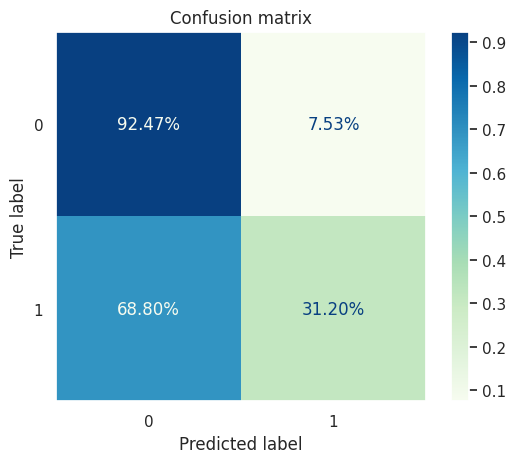

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    predictors_test,
    targets_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')

Above we have run a confusion matrix to review the actual transactions (1) and non-transactions (0) against the predictive transactions (1) and non-transactions. We see that 93.52% of the non-completed tranactions were truly not completeed while 44.62% of the completed tranactions were truly completed.

Thus, we can see that our model predicts better when a transaction is not completed then when it is.

### Cross-Validation

Next, we'll perform cross validation to see what our average accuracy is using this method. First we'll create a function for cross-validation.

In [ ]:
#Cross validation is used to test the accuracy of our model by training and testing the model iterativly.
def cross_validate(predictors, targets, num_loops):
  """Randomly splits predictor and target values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops) #each iteration will perform one train-test cycle

  for i in range(num_loops):
    model_split_cv = GaussianNB() # a new model is created each iteration and then used for the classification (fit)
    predictors_train, predictors_test, targets_train, targets_test = model_selection.train_test_split(predictors, targets, test_size = 0.2)
    model_split_cv.fit(predictors_train, targets_train)
    targets_split_pred = model_split_cv.predict(predictors_test) #each trained model i sused to predict the target values
    accuracy_scores[i] = metrics.accuracy_score(targets_test, targets_split_pred) #here the accuracy scores are the calculated by comparing the predicted values to the actual values for the targets


  return accuracy_scores



In [ ]:
accuracy_scores = cross_validate(predictors, targets, num_loops=10)
print("Accuracy scores:", accuracy_scores)
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Standard Deviation of Accuracy:", np.std(accuracy_scores))


Accuracy scores: [0.86380556 0.86588889 0.86333333 0.86244444 0.86313889 0.86597222
 0.8645     0.86394444 0.86613889 0.86308333]
Mean Accuracy: 0.864225
Standard Deviation of Accuracy: 0.0012752662515513047


We are seeing about 88.7% accuracy from our mean accuracy but as you can see in the array this is very close to the individual accuracies.

## Data Visualization

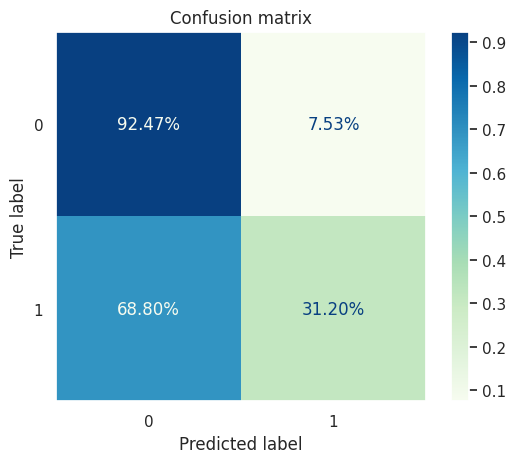

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(
   gnb,
    predictors_test,
    targets_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')

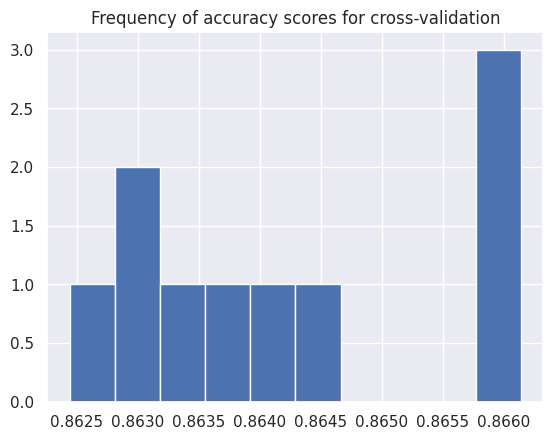

In [ ]:
plt.hist(accuracy_scores)
plt.title('Frequency of accuracy scores for cross-validation')
plt.show()

We can see that we have a decent average accuracy.  I would say there is an overall low spread between the best and worst performming runs when looking at our cross-validation results.  I cant predict or infer why this might be without understanding more about the anonamized columns. But when I look back at the outlier data this may have hinted at why the ability to predict the non-transaction was more predictable then the actual transactions. Note: The histogram is not normally distributed and leans to the right.

###Assess the accuracy with a more balanced dataset

In [ ]:
len(project1_target_1)


18040

In [ ]:
len(project1_target_0)

161960

In [ ]:
project1_target_0_smaller= project1_target_0.sample(n=len(project1_target_1))
len(project1_target_0_smaller)

18040

In [ ]:
concat_df = pd.concat([project1_target_1, project1_target_0_smaller])
concat_df.head()

target    var_0   var_1    var_2   var_3   var_4    var_5    var_6  \
13       1  16.3699  1.5934  16.7395  4.8222  8.6978  13.7999   2.7925   
29       1   5.3301 -2.6064  13.1913  5.9064  9.1168  14.0957  12.3335   
63       1   7.7072  0.0183   9.9974  6.0425  6.6710  14.0503   9.0144   
65       1  10.5358 -2.5439   8.7394  5.1584  9.0358  13.6021   4.2864   
71       1   6.7547  2.5973  14.2141  4.2336  9.1282  13.9394   3.6480   

      var_7    var_8  ...  var_42   var_43  var_44   var_45  var_46  var_47  \
13  14.3984  19.4258  ... -2.2723  15.7383  8.5618  11.8982  7.4002  7.4031   
29   1.6610  13.0446  ...  4.1428   4.7056  4.3694  16.4554  5.9215  7.9676   
63  -2.3445  23.5101  ...  2.2445  23.1283  2.9384  27.6213  1.5832  5.0039   
65  13.8723   2.2106  ... -7.2104  19.7545  6.3190  11.9410  4.6648  6.4227   
71  24.2658  33.3687  ...  0.3140  20.4828  7.9488  11.2587  1.4677  3.5935   

    var_48   var_49  outlier  cluster  
13  4.3989  15.6064        1        0  
29  2.3405  17.4105        1        0  
63  3.8814  15.7685       -1        2  
65  3.4025  15.1340        1        0  
71  2.0013  18.9013       -1        1  

[5 rows x 53 columns]

In [ ]:
gnb2 = GaussianNB() #This is to create the empty GNB model that will be added to below.

In [ ]:
targets2 = concat_df['target'].copy() #y is the target column for the training, aka 'target'
predictors2 = concat_df.drop('target', axis=1, inplace=False) #x is the feature data that will be used to train the model. AKA all 'Var_' columns


In [ ]:
#we will create 4 dataframes: two (train and test) for the predictor features and two (train and test) for the target features
predictors2_train, predictors2_test, targets2_train, targets2_test = train_test_split(predictors2, targets2, test_size=0.20, random_state=0)

#next we will plug the training data into the GNB model and use the fit function to create a predictive model
gnb2.fit(predictors2_train, targets2_train)

#now that we have a predictive GNB model we will then input using the predict function our predictor test set into the funct to get a target output
targets2_pred = gnb2.predict(predictors2_test)

#Does the target output that was predicted by the GNB model match the target test set? and by how much is it off? This is what will be provided below for us.
print("Number of mislabeled points out of a total %d points : %d"
      % (predictors2_test.shape[0], (targets2_test != targets2_pred).sum()))

Number of mislabeled points out of a total 7216 points : 1918


In [ ]:
#Cross validation is used to test the accuracy of our model by training and testing the model iterativly.
def cross_validate(predictors2, targets2, num_loops):
  """Randomly splits predictor and target values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores2 = np.zeros(num_loops) #each iteration will perform one train-test cycle

  for i in range(num_loops):
    model_split_cv2 = GaussianNB() # a new model is created each iteration and then used for the classification (fit)
    predictors2_train, predictors2_test, targets2_train, targets2_test = model_selection.train_test_split(predictors2, targets2, test_size = 0.2)
    model_split_cv2.fit(predictors2_train, targets2_train)
    targets2_split_pred = model_split_cv2.predict(predictors2_test) #each trained model i sused to predict the target values
    accuracy_scores2[i] = metrics.accuracy_score(targets2_test, targets2_split_pred) #here the accuracy scores are the calculated by comparing the predicted values to the actual values for the targets


  return accuracy_scores2



In [ ]:
accuracy_scores2 = cross_validate(predictors2, targets2, num_loops=10)
print("Accuracy scores:", accuracy_scores2)
print("Mean Accuracy:", np.mean(accuracy_scores2))
print("Standard Deviation of Accuracy:", np.std(accuracy_scores2))


Accuracy scores: [0.72616408 0.73073725 0.73794346 0.72838137 0.73572616 0.73738914
 0.73628049 0.73461752 0.73350887 0.73032151]
Mean Accuracy: 0.7331069844789357
Standard Deviation of Accuracy: 0.003808051690264233


We are still getting an accuracy score of 75.2% which is quite a bit lower then previously reported with the imbalenced data set

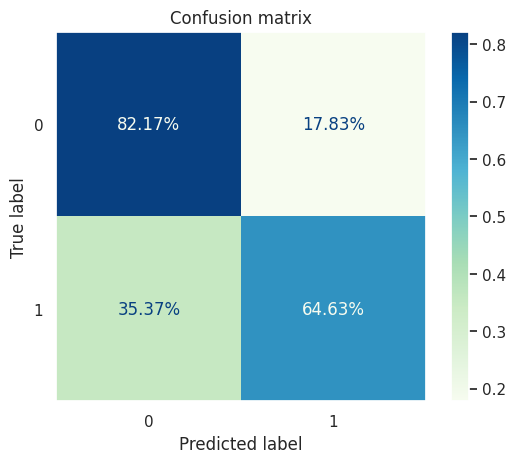

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb2,
    predictors2_test,
    targets2_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')

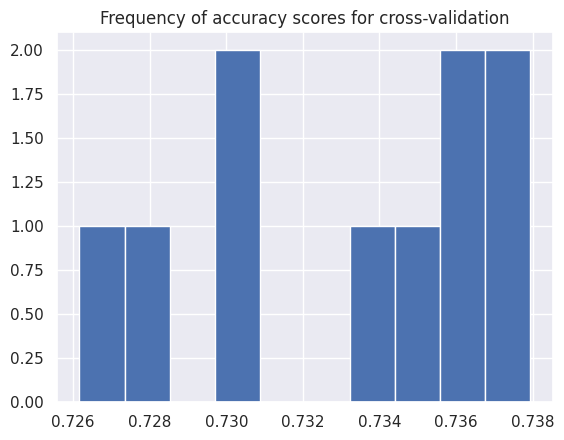

In [ ]:
plt.hist(accuracy_scores2)
plt.title('Frequency of accuracy scores for cross-validation')
plt.show()

In [ ]:
# We can do some additional calculations to determine accuracy, precision, recall, and F1-Score
#Accuracy gives us information on the models performace
#Precision gives us the number of pos pred that were actually true pos
# Recall gives us the number of pos that were correctly identified
# F1-Score is how to determine the balance of FP and FN in the model.



# Import necessary libraries needed to calclate the different metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report

# Assuming 'y_test' is your true labels and 'y_pred' is your model's predictions
# Example with Gaussian Naive Bayes model from previous example
accuracy2 = accuracy_score(targets_test, targets_pred)
print(f"Accuracy: {accuracy2:.4f}")

# Calculate Precision, Recall, and F1-Score
precision2 = precision_score(targets_test, targets_pred)
recall2 = recall_score(targets_test, targets_pred)
f1_2 = f1_score(targets_test, targets_pred)

# Print Precision, Recall, and F1-Score
print(f"Precision: {precision2:.4f}")
print(f"Recall: {recall2:.4f}")
print(f"F1-Score: {f1_2:.4f}")

# Optionally, display confusion matrix and full classification report
print("\nConfusion Matrix:")
print(confusion_matrix(targets_test, targets_pred))

print("\nClassification Report:")
print(classification_report(targets_test, targets_pred))


Accuracy: 0.8631
Precision: 0.3168
Recall: 0.3120
F1-Score: 0.3144

Confusion Matrix:
[[29941  2437]
 [ 2492  1130]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     32378
           1       0.32      0.31      0.31      3622

    accuracy                           0.86     36000
   macro avg       0.62      0.62      0.62     36000
weighted avg       0.86      0.86      0.86     36000



Above we have run a confusion matrix to review the actual transactions (1) and non-transactions (0) against the predictive transactions (1) and non-transactions. We see that 89.47% of the non-completed tranactions were truly not completeed while 63.68% of the completed tranactions were truly completed.

Thus, we can see that our model predicts better when a transaction is not completed then when it is similar to previous but we can also now see that our completed transaction predition matches above 50% which much better then the previous result now that our data is more balanced.

## Conclusion

### Important features

We did not find that there was any specific featuer (var_) that was more important then any other. I did find that when I ran the IsolationForest (with the help of stackoverflow and searching other ways to explor my data) that there was a difference for when the transaction did not complete which may have hinted at the imbalence in our dataset.

### Model performance

- Using Naive Bayes resulted in an average accuracy of 88% in our cross-validation tests.
- Very few of our features are correlated with eachoterh
- Our model did better at predicting when when a tranaction did not occur than when it did due to there being significanlty more data for non-completed transactions.
### Future exploration/ Next steps

- It would be worth exploring alternative models but having explored a few plots this may not provide more data. Unananomizing the columns may help us to determine why about half of them have a very very low pos correlation and why approx half of them have a very very low neg correlation.
- Create a balanced data set by removing some of the non-completed transactiondata to create a model that predicts with more equal accuracy lowered the overall accuracy but improved to TP and FP detection.

- overall the correlation of this data was not very descriptive but there were a few exploration techniques that lead to determine there was an imbalanced data set. It may be worth understanding the vars better and if they individuall without the target column have any correlation say running only the pos corrlation or only the negative corrlation data to see if that has any affect on the model(s).